# Data Processing

## Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Extract and merge data

In [3]:
fertility_rate_df = pd.read_csv('fertility_rate.csv', skiprows=4)
fertility_rate_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

capital_gdp_df = pd.read_csv('capital_gdp.csv', skiprows=4)
capital_gdp_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

poverty_rate_df = pd.read_csv('poverty_rate.csv', skiprows=4)
poverty_rate_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

gini_index_df = pd.read_csv('Gini_index.csv', skiprows=4)
gini_index_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

literacy_rate_df = pd.read_csv('Literacy_rate.csv', skiprows=4)
literacy_rate_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

unemployment_rate_df = pd.read_csv('Unemployment_rate.csv', skiprows=4)
unemployment_rate_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

female_percentage_df = pd.read_csv('female percentage of total population.csv', skiprows=4)
female_percentage_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)


# Remove 'Unnamed: 66' column
fertility_rate_df.drop(columns=['Unnamed: 66'], inplace=True)
capital_gdp_df.drop(columns=['Unnamed: 66'], inplace=True)
poverty_rate_df.drop(columns=['Unnamed: 66'], inplace=True)
gini_index_df.drop(columns=['Unnamed: 66'], inplace=True)
literacy_rate_df.drop(columns=['Unnamed: 66'], inplace=True)
unemployment_rate_df.drop(columns=['Unnamed: 66'], inplace=True)
female_percentage_df.drop(columns=['Unnamed: 66'], inplace=True)


fertility_rate_long = fertility_rate_df.melt(id_vars=['Country Name'], var_name='Year', value_name='FertilityRate')
capital_gdp_long = capital_gdp_df.melt(id_vars=['Country Name'], var_name='Year', value_name='CapitalGDP')
poverty_rate_long = poverty_rate_df.melt(id_vars=['Country Name'], var_name='Year', value_name='PovertyRate')
gini_index_long = gini_index_df.melt(id_vars=['Country Name'], var_name='Year', value_name='GiniIndex')
literacy_rate_long  = literacy_rate_df.melt(id_vars=['Country Name'], var_name='Year', value_name='LiteracyRate')
unemployment_rate_long = unemployment_rate_df.melt(id_vars=['Country Name'], var_name='Year', value_name='UnemploymentRate')
female_percentage_long = female_percentage_df.melt(id_vars=['Country Name'], var_name='Year', value_name='FemalePercentage')

# Now convert the 'Year' column to integer data type
fertility_rate_long['Year'] = fertility_rate_long['Year'].astype(int)
capital_gdp_long['Year'] = capital_gdp_long['Year'].astype(int)
poverty_rate_long['Year'] = poverty_rate_long['Year'].astype(int)
gini_index_long['Year'] = gini_index_long['Year'].astype(int)
literacy_rate_long['Year'] = literacy_rate_long['Year'].astype(int)
unemployment_rate_long['Year'] = unemployment_rate_long['Year'].astype(int)
female_percentage_long['Year'] = female_percentage_long['Year'].astype(int)

merged_df = (
    fertility_rate_long
    .merge(capital_gdp_long, on=['Country Name', 'Year'])
    .merge(poverty_rate_long, on=['Country Name', 'Year'])
    .merge(gini_index_long, on=['Country Name', 'Year'])
    .merge(literacy_rate_long, on=['Country Name', 'Year'])
    .merge(unemployment_rate_long, on=['Country Name', 'Year'])
    .merge(female_percentage_long, on=['Country Name', 'Year'])
)



## Select Data

In [4]:
# to improve the representativeness of the data, we only selected data after 1990
merged_df = merged_df[merged_df['Year'] >= 1990]
merged_df.head()

Country Name  Year  FertilityRate    CapitalGDP  \
7980                        Aruba  1990       2.303000  11638.733706   
7981  Africa Eastern and Southern  1990       6.166608    817.175973   
7982                  Afghanistan  1990       7.565000           NaN   
7983   Africa Western and Central  1990       6.518278    589.158849   
7984                       Angola  1990       7.272000    949.286381   

      PovertyRate  GiniIndex  LiteracyRate  UnemploymentRate  FemalePercentage  
7980          NaN        NaN           NaN               NaN         50.949598  
7981          NaN        NaN      57.19595               NaN         50.644383  
7982          NaN        NaN           NaN               NaN         49.990753  
7983          NaN        NaN      44.01223               NaN         50.052719  
7984          NaN        NaN           NaN               NaN         50.650016

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 7980 to 16491
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      8512 non-null   object 
 1   Year              8512 non-null   int32  
 2   FertilityRate     7825 non-null   float64
 3   CapitalGDP        7953 non-null   float64
 4   PovertyRate       2226 non-null   float64
 5   GiniIndex         1807 non-null   float64
 6   LiteracyRate      2249 non-null   float64
 7   UnemploymentRate  7283 non-null   float64
 8   FemalePercentage  8480 non-null   float64
dtypes: float64(7), int32(1), object(1)
memory usage: 631.8+ KB


## Deal with all the NAN data in dataset

In [6]:
# Check and confirm for any missing values
print(merged_df.isna().sum())

Country Name           0
Year                   0
FertilityRate        687
CapitalGDP           559
PovertyRate         6286
GiniIndex           6705
LiteracyRate        6263
UnemploymentRate    1229
FemalePercentage      32
dtype: int64


In [7]:
from sklearn.impute import KNNImputer

# Instantiate the KNNImputer with a specific number of neighbors (e.g., 3)
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data, excluding 'Country Name' column
imputed_data = imputer.fit_transform(merged_df.drop(columns=['Country Name']))

# Create a new DataFrame with the imputed values and the original column names, excluding 'Country Name'
imputed_df = pd.DataFrame(imputed_data, columns=merged_df.columns[1:])

# Add the 'Country Name' and 'Year' columns back to the imputed DataFrame
imputed_df.insert(loc=0, column='Country Name', value=merged_df['Country Name'].values)
imputed_df['Year'] = merged_df['Year'].values

merged_df = imputed_df


In [8]:
#Check and confirm for any missing values
print(merged_df.isna().sum())

Country Name        0
Year                0
FertilityRate       0
CapitalGDP          0
PovertyRate         0
GiniIndex           0
LiteracyRate        0
UnemploymentRate    0
FemalePercentage    0
dtype: int64


In [9]:
merged_df

Country Name  Year  FertilityRate    CapitalGDP  \
0                           Aruba  1990       2.303000  11638.733706   
1     Africa Eastern and Southern  1990       6.166608    817.175973   
2                     Afghanistan  1990       7.565000   1951.156948   
3      Africa Western and Central  1990       6.518278    589.158849   
4                          Angola  1990       7.272000    949.286381   
...                           ...   ...            ...           ...   
8507                       Kosovo  2021       2.262000   5269.783901   
8508                  Yemen, Rep.  2021       2.645000  35948.702318   
8509                 South Africa  2021       1.664333   7055.044776   
8510                       Zambia  2021       2.452333   1137.343633   
8511                     Zimbabwe  2021       1.623667   1773.920411   

      PovertyRate  GiniIndex  LiteracyRate  UnemploymentRate  FemalePercentage  
0        7.666667  32.200000     93.875443         13.916000         50.949598  
1       24.966667  44.966667     57.195950          6.445667         50.644383  
2       65.766667  45.400000     44.096046          9.736333         49.990753  
3       34.533333  39.233333     44.012230         11.232667         50.052719  
4       10.833333  37.566667     77.412186         10.050333         50.650016  
...           ...        ...           ...               ...               ...  
8507    23.800000  34.833333     77.231956          5.358667         50.155745  
8508     2.600000  43.200000     75.637953         13.887000         49.461487  
8509    25.200000  35.200000     77.008316         28.770000         51.349534  
8510    33.900000  35.833333     91.356237          6.220000         50.655049  
8511    28.433333  49.233333     89.699997          8.067000         52.832847  

[8512 rows x 9 columns]

In [10]:
merged_df.info()
merged_df.head()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8512 entries, 0 to 8511
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      8512 non-null   object 
 1   Year              8512 non-null   int32  
 2   FertilityRate     8512 non-null   float64
 3   CapitalGDP        8512 non-null   float64
 4   PovertyRate       8512 non-null   float64
 5   GiniIndex         8512 non-null   float64
 6   LiteracyRate      8512 non-null   float64
 7   UnemploymentRate  8512 non-null   float64
 8   FemalePercentage  8512 non-null   float64
dtypes: float64(7), int32(1), object(1)
memory usage: 565.4+ KB


Year  FertilityRate     CapitalGDP  PovertyRate    GiniIndex  \
count  8512.000000    8512.000000    8512.000000  8512.000000  8512.000000   
mean   2005.500000       3.118186   12610.659164    16.798700    35.778352   
std       9.233635       1.600806   20555.767185    16.555481     6.090336   
min    1990.000000       0.792000      22.850371     0.000000    20.700000   
25%    1997.750000       1.813981    1205.547289     3.566667    30.766667   
50%    2005.500000       2.606245    4042.760287     9.000000    35.200000   
75%    2013.250000       4.214000   15462.251418    25.200000    38.900000   
max    2021.000000       8.606000  234315.460504    91.500000    65.800000   

       LiteracyRate  UnemploymentRate  FemalePercentage  
count   8512.000000       8512.000000       8512.000000  
mean      83.544676          8.058394         50.034125  
std       15.453892          5.406985          2.483832  
min       10.894650          0.100000         23.394217  
25%       74.301602          4.320000         49.524259  
50%       88.426477          6.668886         50.302281  
75%       97.310628         10.583755         51.011807  
max      100.000000         38.799999         54.979910

# Data Visualization

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21436\4104504395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


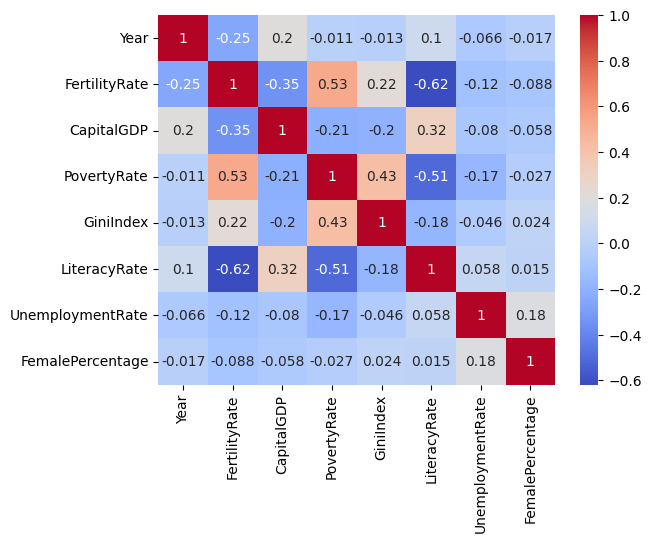

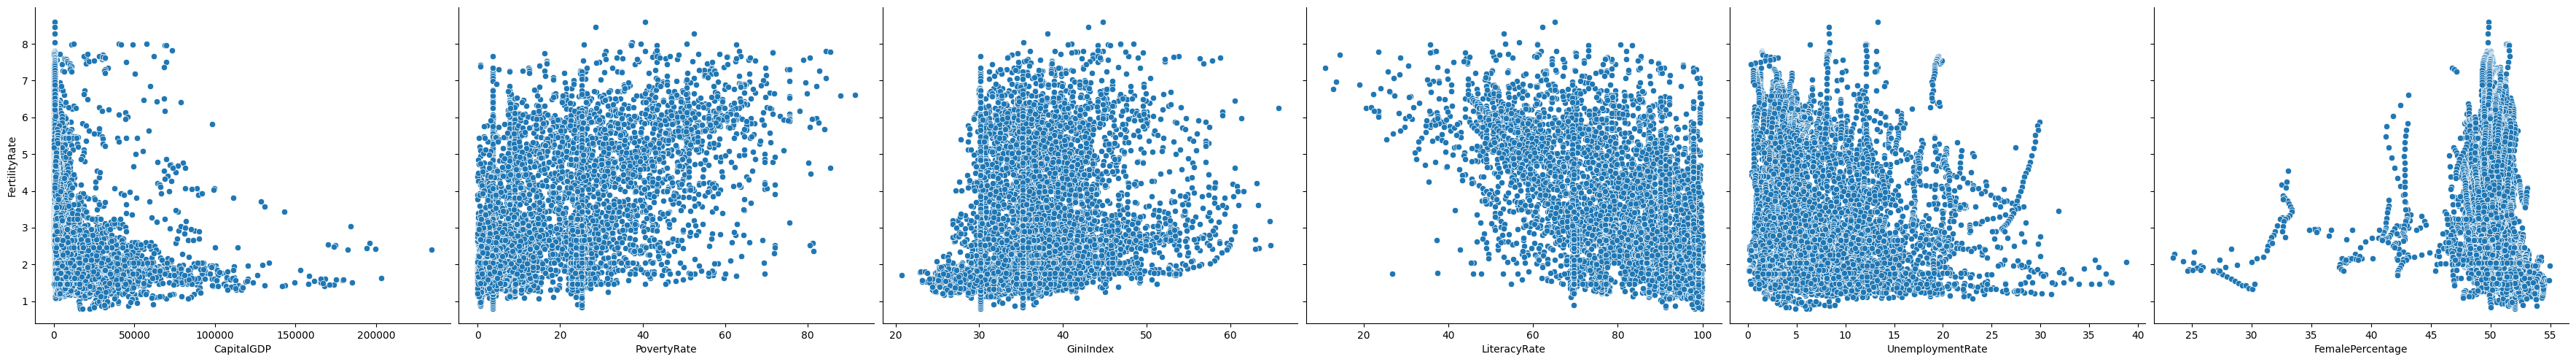

In [11]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# create scatterplots for FertilityRate against other numeric variables
sns.pairplot(data=merged_df, x_vars=['CapitalGDP', 'PovertyRate', 'GiniIndex', 'LiteracyRate', 'UnemploymentRate', 'FemalePercentage'], y_vars='FertilityRate', height=5, aspect=1.2)
plt.show()

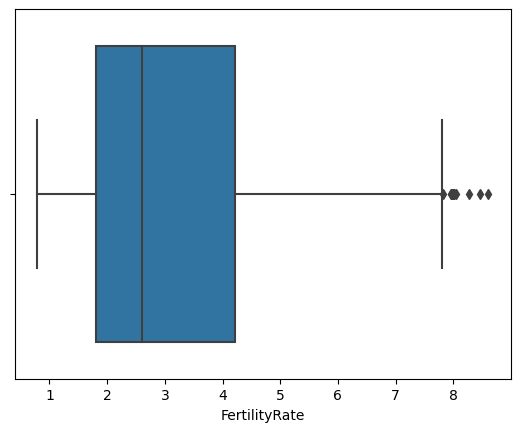

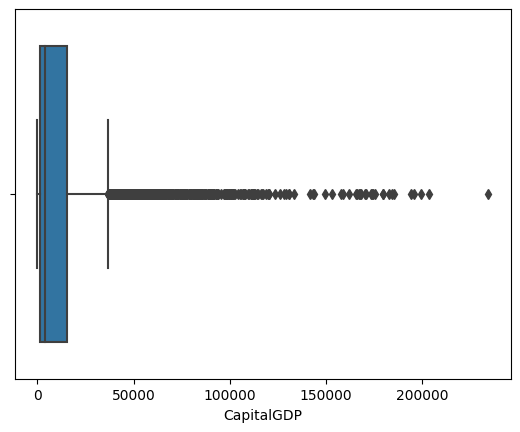

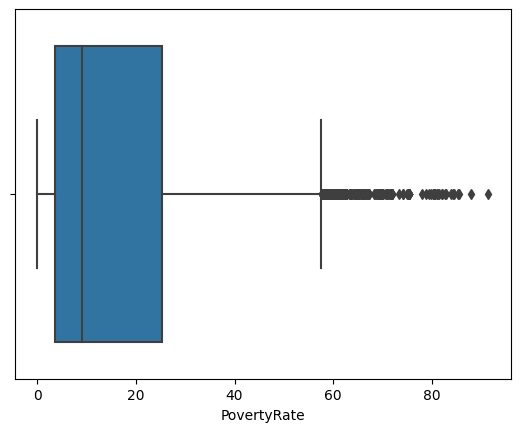

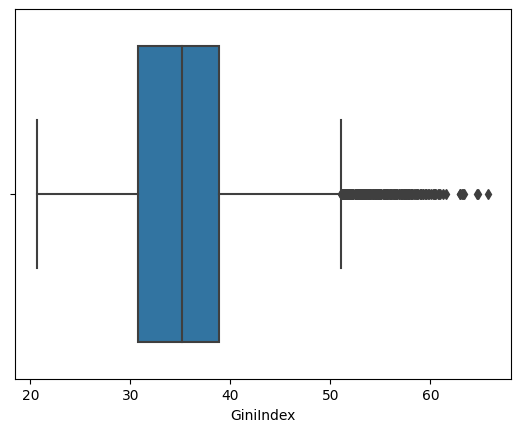

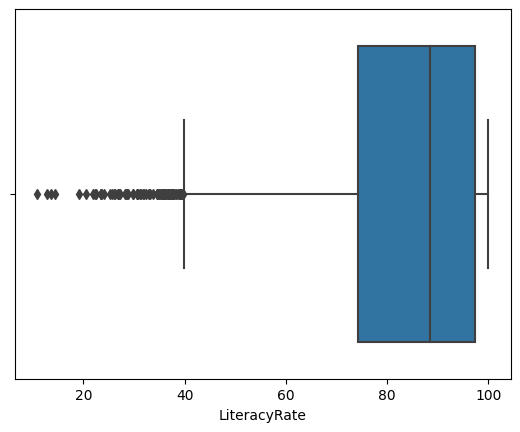

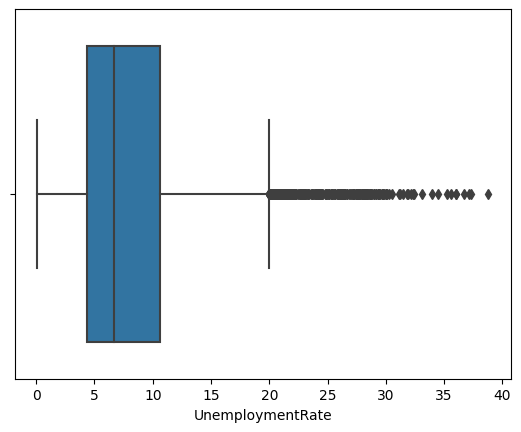

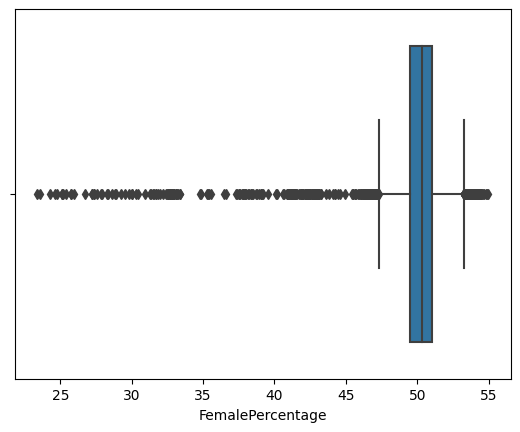

In [12]:
#Checking for outliers in the data
sns.boxplot(x='FertilityRate', data=merged_df)
plt.show()

sns.boxplot(x='CapitalGDP', data=merged_df)
plt.show()

sns.boxplot(x='PovertyRate', data=merged_df)
plt.show()

sns.boxplot(x='GiniIndex', data=merged_df)
plt.show()

sns.boxplot(x='LiteracyRate', data=merged_df)
plt.show()

sns.boxplot(x='UnemploymentRate', data=merged_df)
plt.show()

sns.boxplot(x='FemalePercentage', data=merged_df)
plt.show()

## Handle outliers

In [13]:
# Remove outliers for FertilityRate
Q1 = merged_df['FertilityRate'].quantile(0.25)
Q3 = merged_df['FertilityRate'].quantile(0.75)
IQR = Q3 - Q1
filtered_entries = ((merged_df['FertilityRate'] >= Q1 - 1.5 * IQR) & (merged_df['FertilityRate'] <= Q3 + 1.5 * IQR))
merged_df = merged_df[filtered_entries]

# Remove outliers for CapitalGDP
Q1 = merged_df['CapitalGDP'].quantile(0.25)
Q3 = merged_df['CapitalGDP'].quantile(0.75)
IQR = Q3 - Q1
filtered_entries = ((merged_df['CapitalGDP'] >= Q1 - 1.5 * IQR) & (merged_df['CapitalGDP'] <= Q3 + 1.5 * IQR))
merged_df = merged_df[filtered_entries]

# Remove outliers for PovertyRate
Q1 = merged_df['PovertyRate'].quantile(0.25)
Q3 = merged_df['PovertyRate'].quantile(0.75)
IQR = Q3 - Q1
filtered_entries = ((merged_df['PovertyRate'] >= Q1 - 1.5 * IQR) & (merged_df['PovertyRate'] <= Q3 + 1.5 * IQR))
merged_df = merged_df[filtered_entries]

# Remove outliers for UnemploymentRate
Q1 = merged_df['UnemploymentRate'].quantile(0.25)
Q3 = merged_df['UnemploymentRate'].quantile(0.75)
IQR = Q3 - Q1
filtered_entries = ((merged_df['UnemploymentRate'] >= Q1 - 1.5 * IQR) & (merged_df['UnemploymentRate'] <= Q3 + 1.5 * IQR))
merged_df = merged_df[filtered_entries]



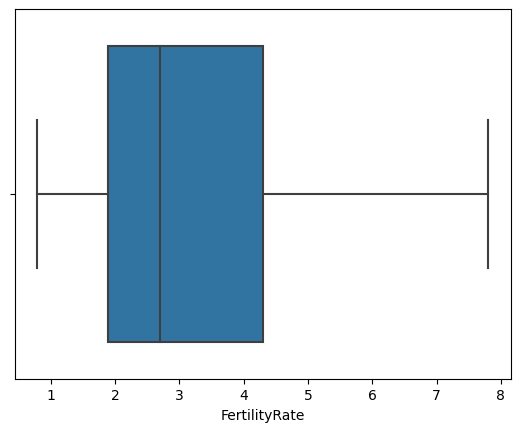

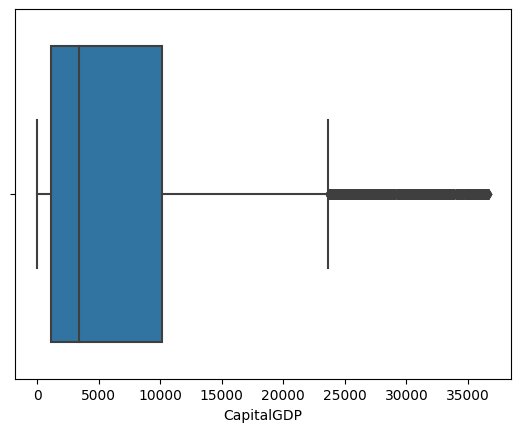

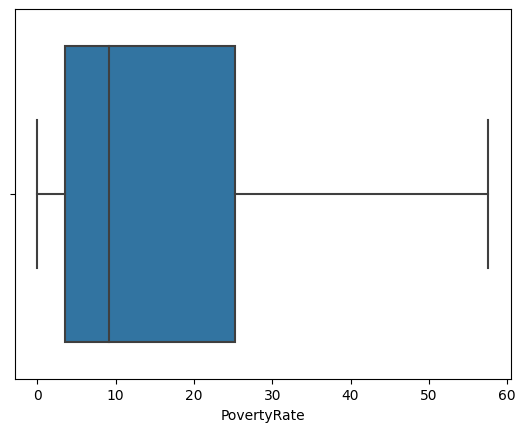

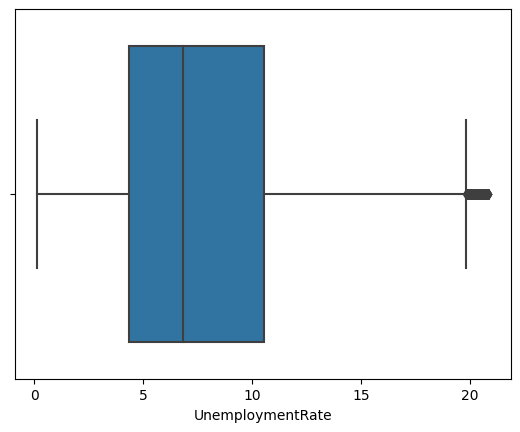

In [14]:
#Confirmed the outliers were removed
sns.boxplot(x='FertilityRate', data=merged_df)
plt.show()

sns.boxplot(x='CapitalGDP', data=merged_df)
plt.show()

sns.boxplot(x='PovertyRate', data=merged_df)
plt.show()

sns.boxplot(x='UnemploymentRate', data=merged_df)
plt.show()


In [15]:
# Summary statistics for each numeric column
print(imputed_df.describe())

              Year  FertilityRate     CapitalGDP  PovertyRate    GiniIndex  \
count  8512.000000    8512.000000    8512.000000  8512.000000  8512.000000   
mean   2005.500000       3.118186   12610.659164    16.798700    35.778352   
std       9.233635       1.600806   20555.767185    16.555481     6.090336   
min    1990.000000       0.792000      22.850371     0.000000    20.700000   
25%    1997.750000       1.813981    1205.547289     3.566667    30.766667   
50%    2005.500000       2.606245    4042.760287     9.000000    35.200000   
75%    2013.250000       4.214000   15462.251418    25.200000    38.900000   
max    2021.000000       8.606000  234315.460504    91.500000    65.800000   

       LiteracyRate  UnemploymentRate  FemalePercentage  
count   8512.000000       8512.000000       8512.000000  
mean      83.544676          8.058394         50.034125  
std       15.453892          5.406985          2.483832  
min       10.894650          0.100000         23.394217  
25%    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17748\1972265689.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


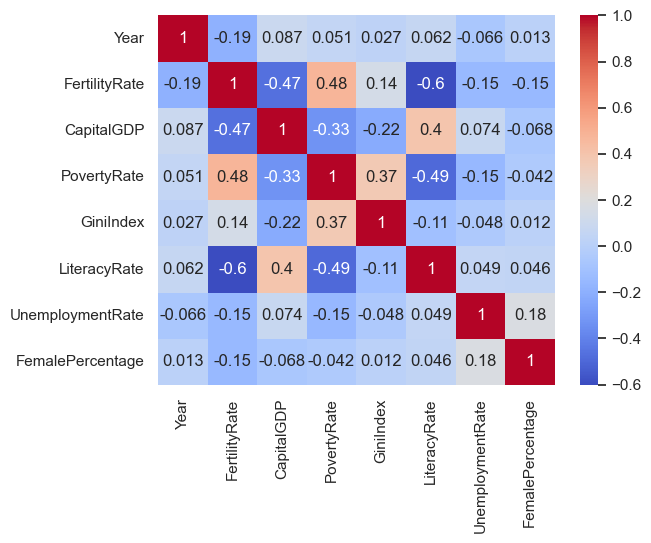

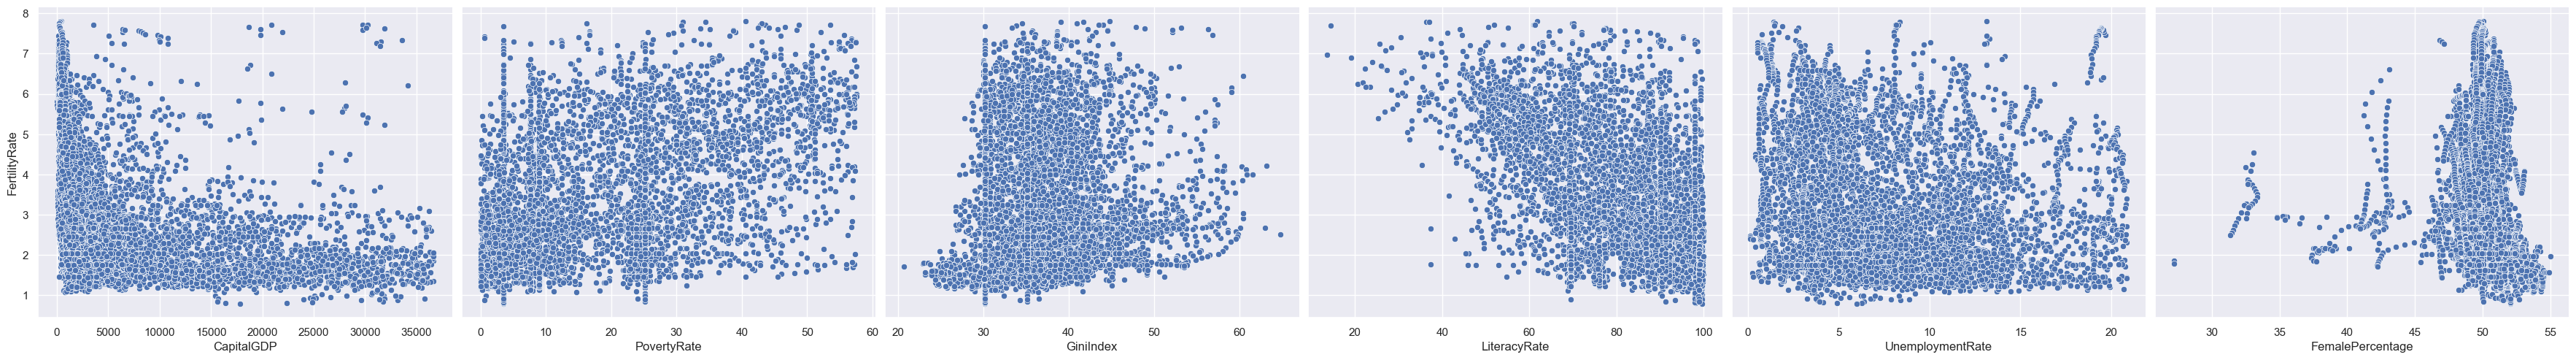

In [498]:
#Checking for corelation between variables
import seaborn as sns

corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# create scatterplots for FertilityRate against other numeric variables
sns.pairplot(data=merged_df, x_vars=['CapitalGDP', 'PovertyRate', 'GiniIndex', 'LiteracyRate', 'UnemploymentRate', 'FemalePercentage'], y_vars='FertilityRate', height=5, aspect=1.2)
plt.show()

After removing the outliers from the data, we can see that the scatterplots and heatmap show a more reasonable and consistent relationship between the variables. The scatterplots now show a slightly more linear relationship between FertilityRate and the other numeric variables, with fewer outliers that were previously skewing the data. The heatmap also shows stronger correlations between the variables, with less variation and noise in the data. Based on these observations, it seems that removing the outliers was a necessary step to improve the accuracy and validity of our analysis. By removing the outliers, we were able to identify and address potential issues in the data, which allowed us to gain a more accurate understanding of the relationships between the variables.

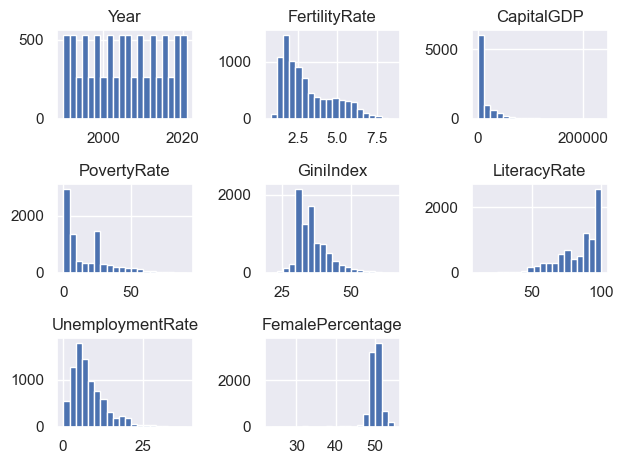

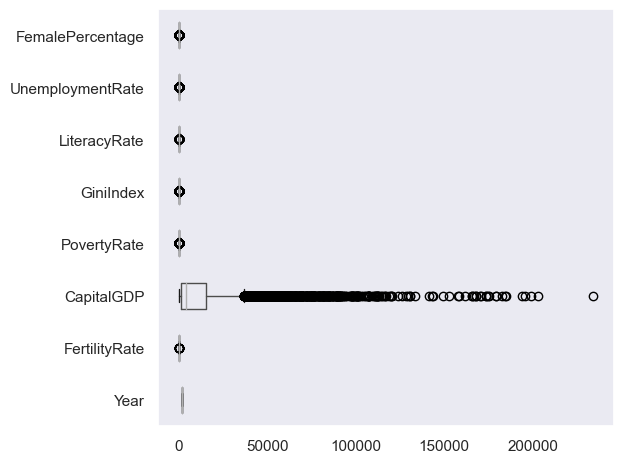

In [499]:
# Histograms for each numeric column
imputed_df.hist(bins=20)
plt.tight_layout()
plt.show()

# Box plots for each numeric column
imputed_df.boxplot(grid=False, vert=False)
plt.tight_layout()
plt.show()

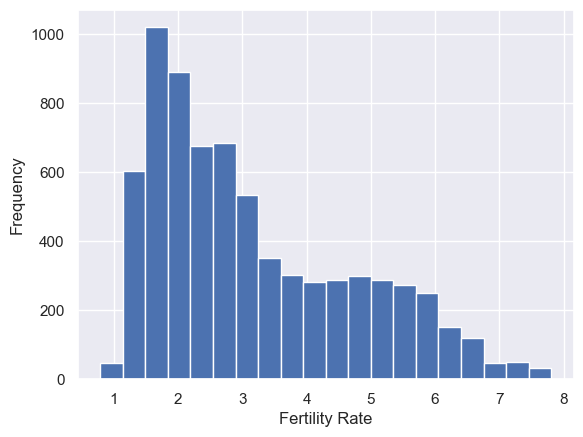

In [500]:
#Visualise the distribution
import matplotlib.pyplot as plt

plt.hist(merged_df['FertilityRate'], bins=20)
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.show()

# Machine Learning - Linear Regression

In [501]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Predicting fertility rate using CapitalGDP

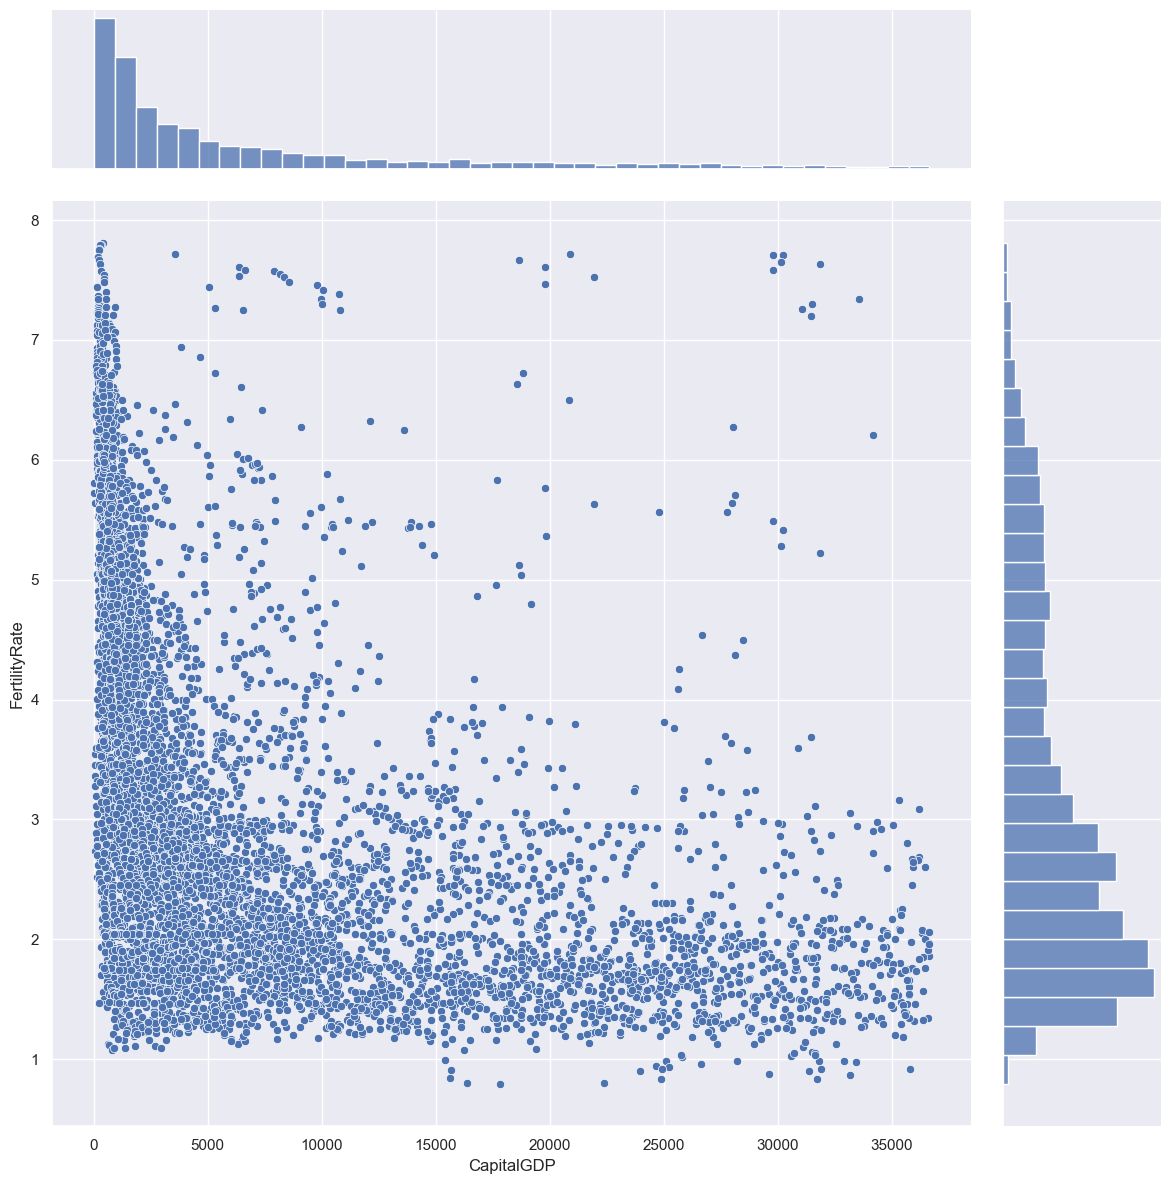

In [502]:
capital_gdp_df = pd.read_csv('capital_gdp.csv', skiprows=4)
sb.jointplot(data = merged_df, x = "CapitalGDP", y = "FertilityRate", height = 12)

In [503]:
merged_df.FertilityRate.corr(merged_df.CapitalGDP)

-0.46966244030906146

In [504]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [505]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split
# Extract Response and Predictors
y = pd.DataFrame(merged_df['FertilityRate'])
X = pd.DataFrame(merged_df['CapitalGDP'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5743, 1) (5743, 1)
Test Set  : (1436, 1) (1436, 1)


In [506]:
linreg.fit(X_train, y_train)

LinearRegression()

In [507]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3.75519886]
Coefficients 	: a =  [[-8.11906946e-05]]


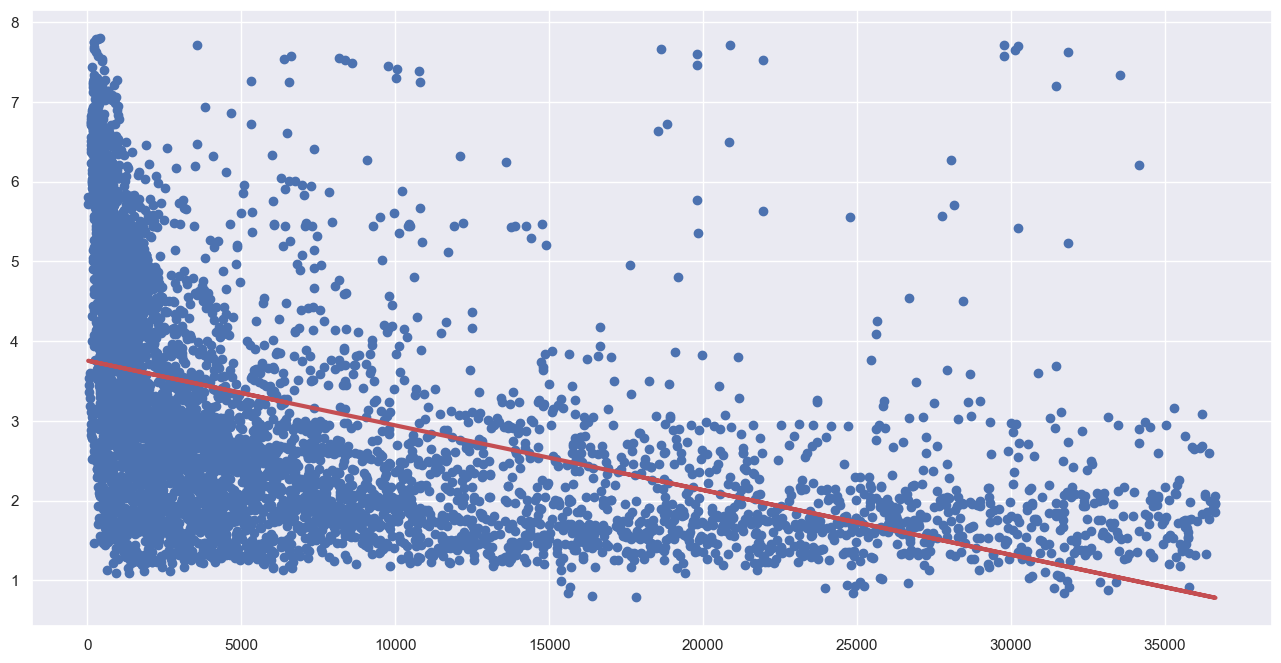

In [508]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [509]:
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.21536338109152242


In [510]:
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 1.8949283328826396


In [511]:
# Predict FertilityRate values corresponding to PovertyRate
y_test_pred = linreg.predict(X_test)

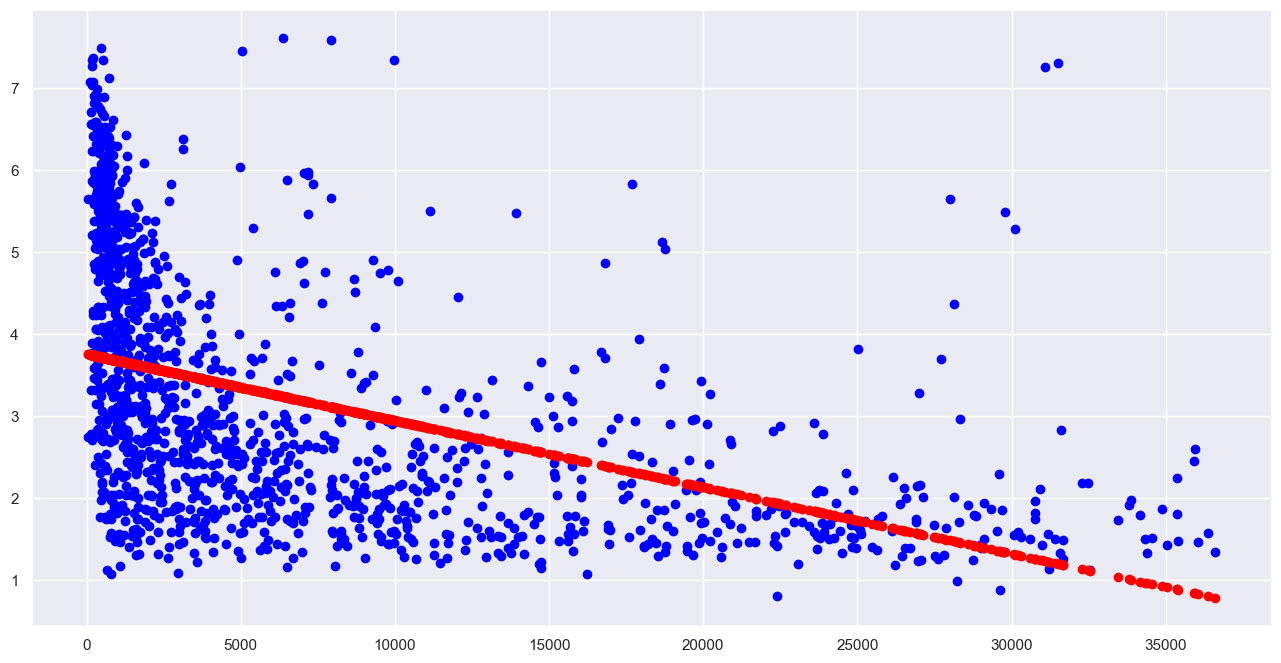

In [512]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [513]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 1.8610309793984348


## Predicting fertility rate using poverty rate

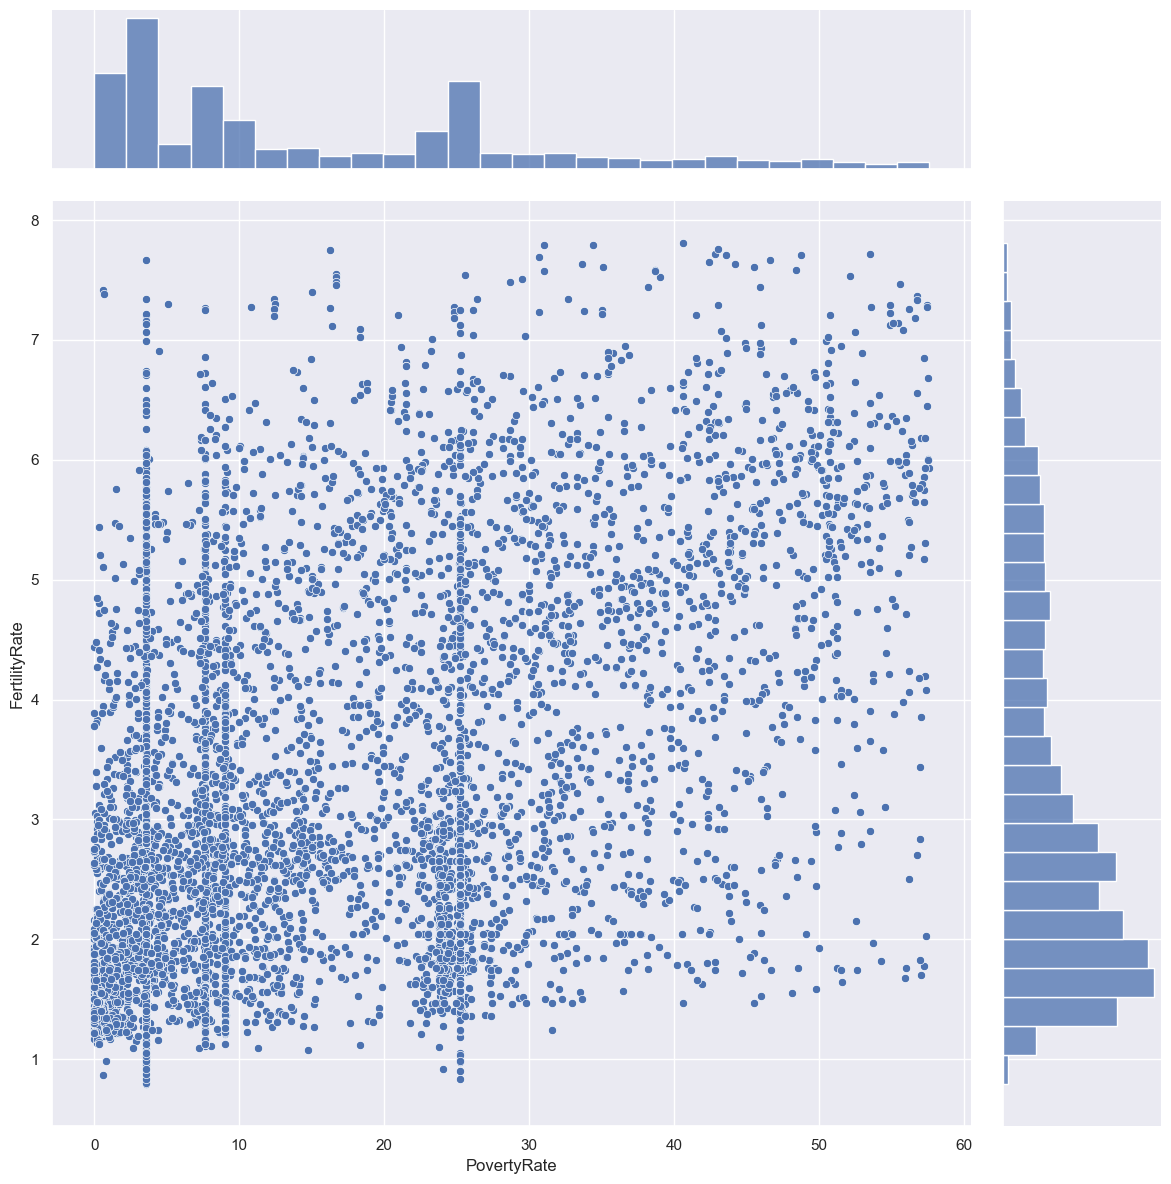

In [514]:
poverty_rate_df = pd.read_csv('poverty_rate.csv', skiprows=4)
sb.jointplot(data = merged_df, x = "PovertyRate", y = "FertilityRate", height = 12)

In [515]:
merged_df.FertilityRate.corr(merged_df.PovertyRate)

0.47994592628735766

In [516]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [517]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(merged_df['FertilityRate'])
X = pd.DataFrame(merged_df['PovertyRate'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5743, 1) (5743, 1)
Test Set  : (1436, 1) (1436, 1)


In [518]:
linreg.fit(X_train, y_train)

LinearRegression()

In [519]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2.3453116]
Coefficients 	: a =  [[0.05108753]]


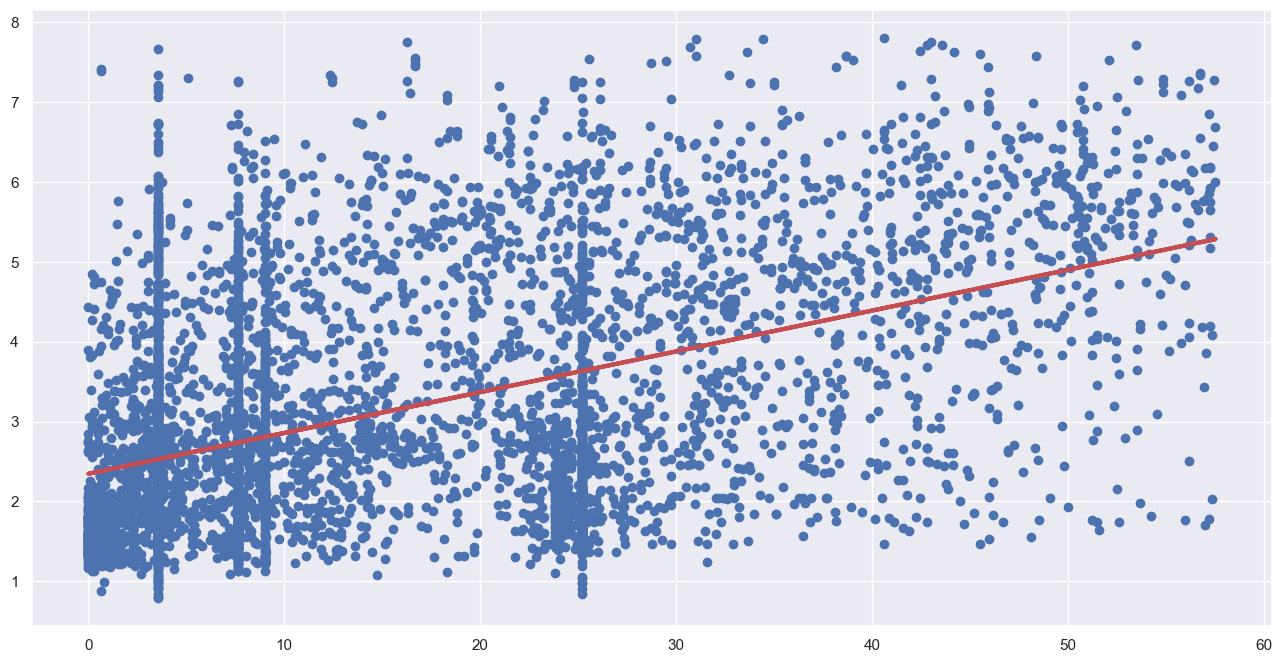

In [520]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [521]:
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.23025031695533382


In [522]:
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 1.8775842371932994


In [523]:
# Predict FertilityRate values corresponding to PovertyRate
y_test_pred = linreg.predict(X_test)

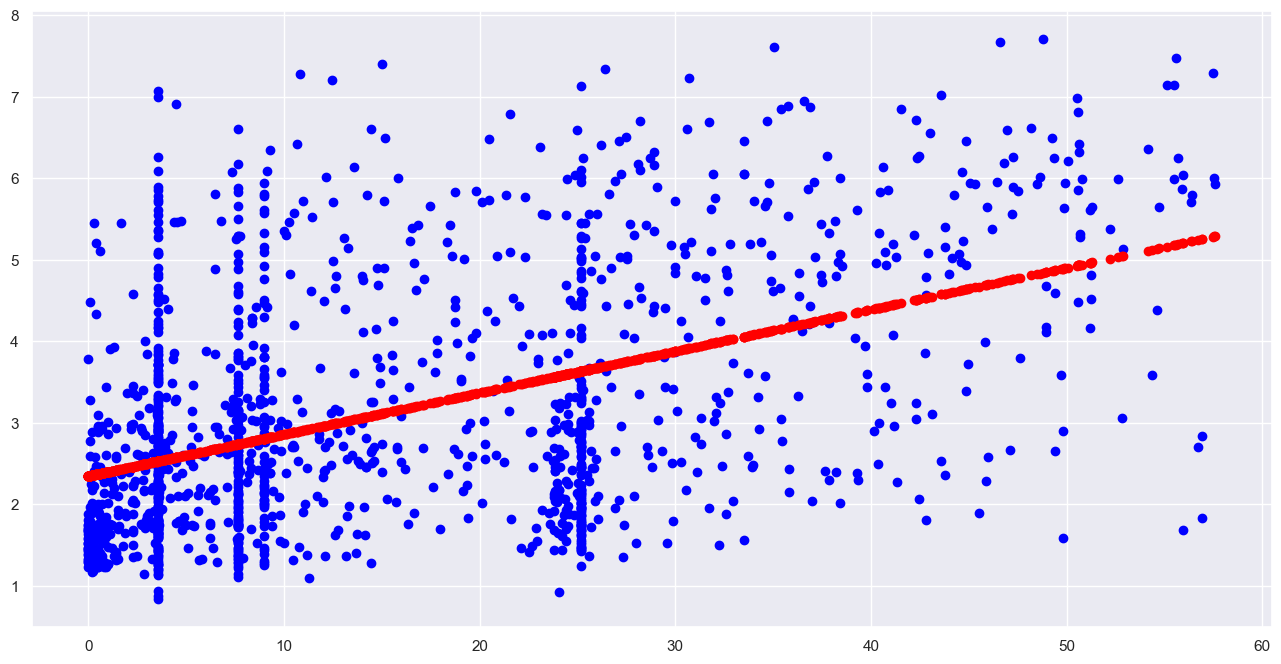

In [524]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [525]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 1.8102092557894458


## Predicting fertility rate using unemployment rate

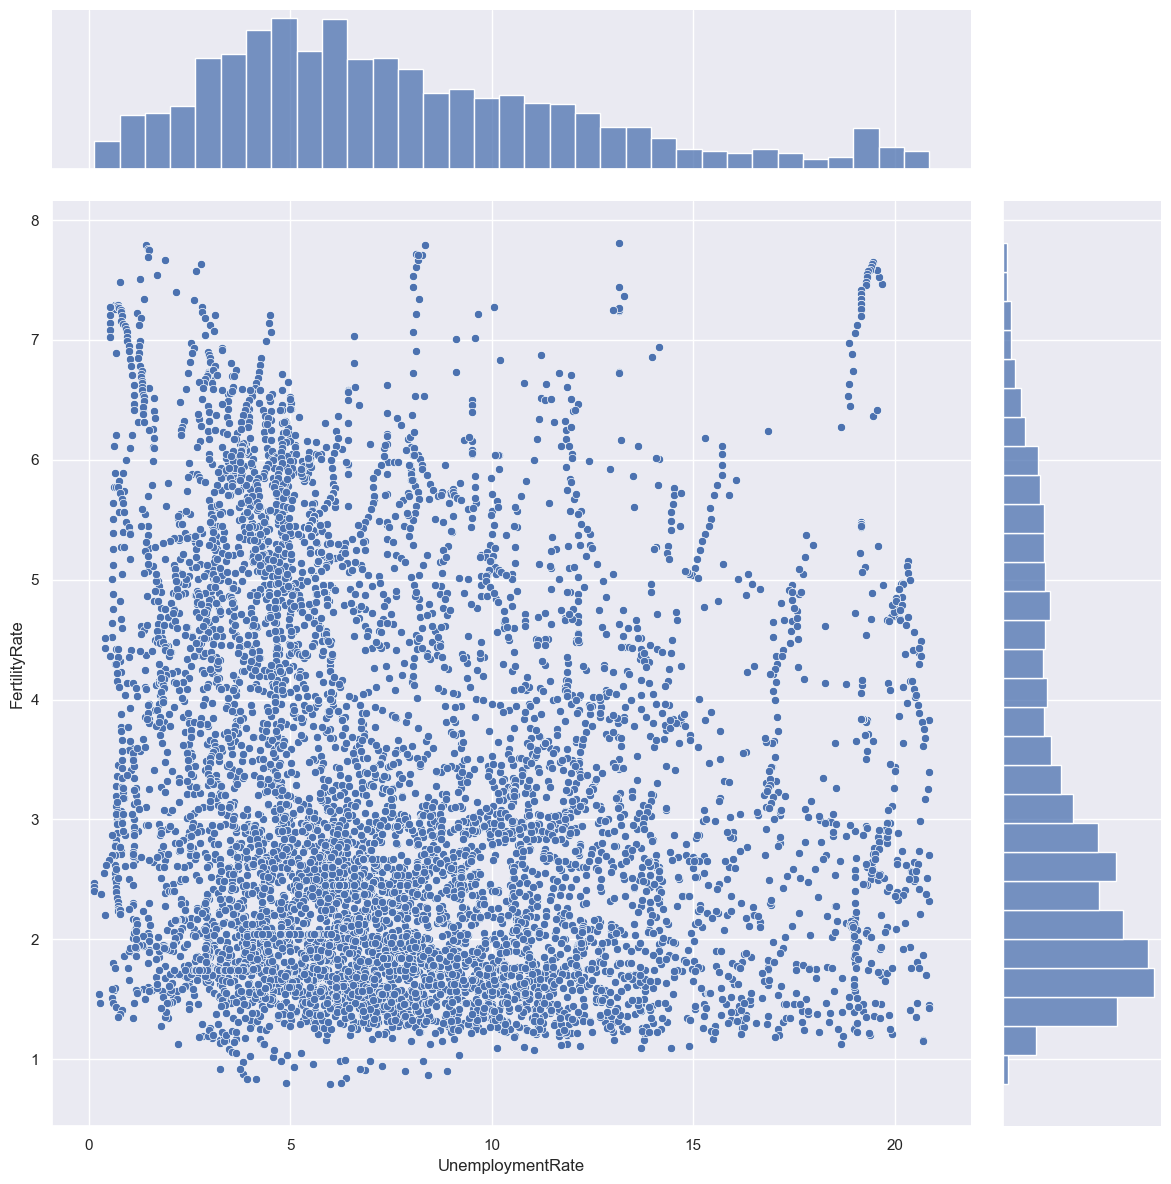

In [526]:
unemployment_rate_df = pd.read_csv('Unemployment_rate.csv', skiprows=4)
sb.jointplot(data = merged_df, x = "UnemploymentRate", y = "FertilityRate", height = 12)

In [527]:
merged_df.FertilityRate.corr(merged_df.UnemploymentRate)

-0.14663986572855245

In [528]:
# Create a Linear Regression object
linreg2 = LinearRegression()

In [529]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(merged_df['FertilityRate'])
X = pd.DataFrame(merged_df['UnemploymentRate'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5743, 1) (5743, 1)
Test Set  : (1436, 1) (1436, 1)


In [530]:
linreg2.fit(X_train, y_train)

LinearRegression()

In [531]:
print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

Intercept 	: b =  [3.55604913]
Coefficients 	: a =  [[-0.04901144]]


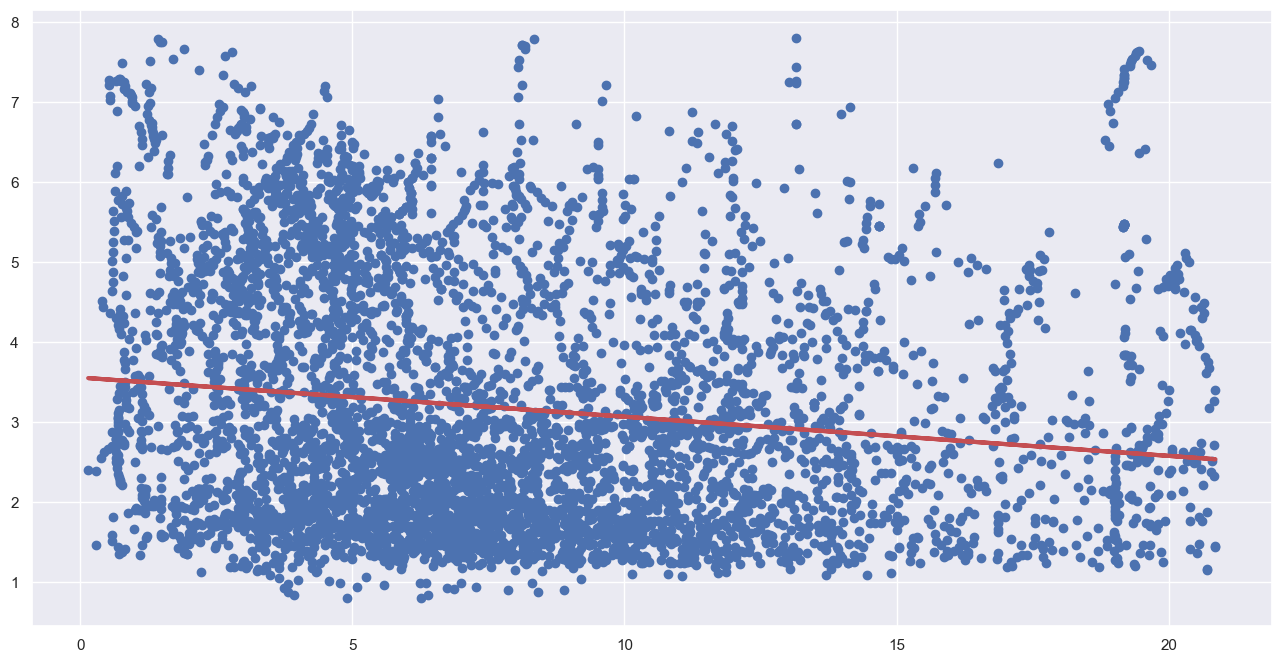

In [532]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg2.intercept_ + linreg2.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [533]:
print("Explained Variance (R^2) \t:", linreg2.score(X_train, y_train))

Explained Variance (R^2) 	: 0.021486345938417806


In [534]:
# Predict the response on the train set
y_train_pred = linreg2.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 2.369173010060215


In [535]:
# Predict FertilityRate values corresponding to UnemploymentRate
y_test_pred = linreg2.predict(X_test)

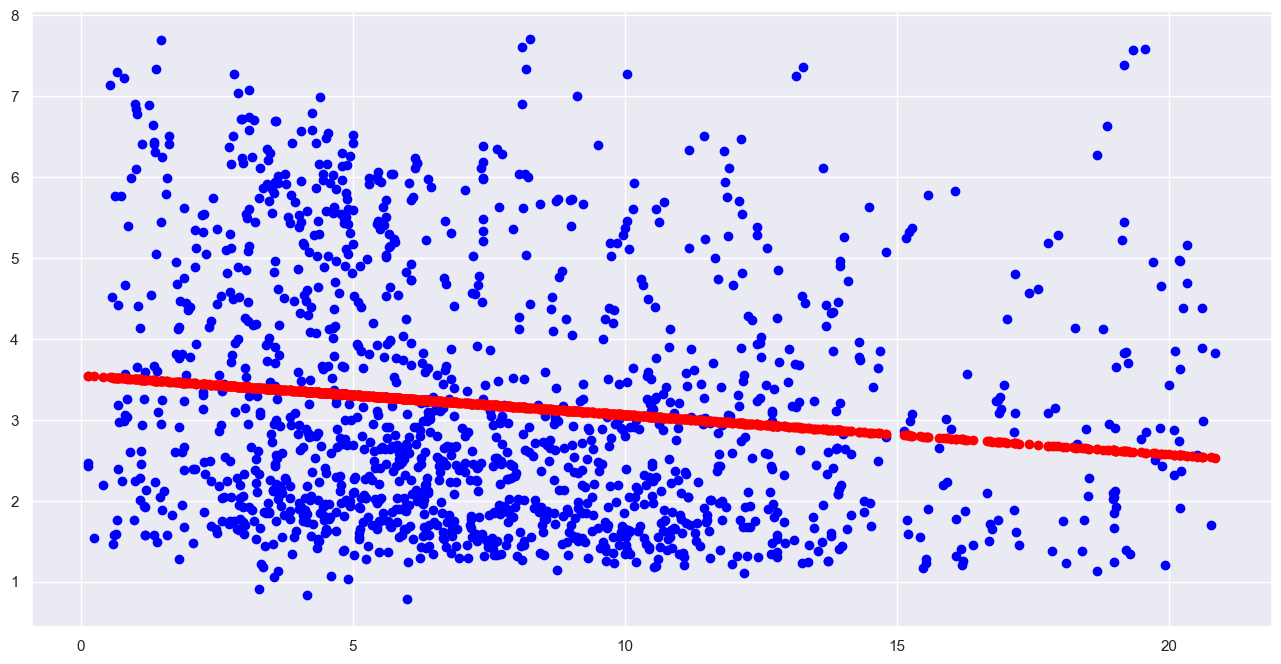

In [536]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [537]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 2.372987304491087


## Predicting fertility rate using Gini Index

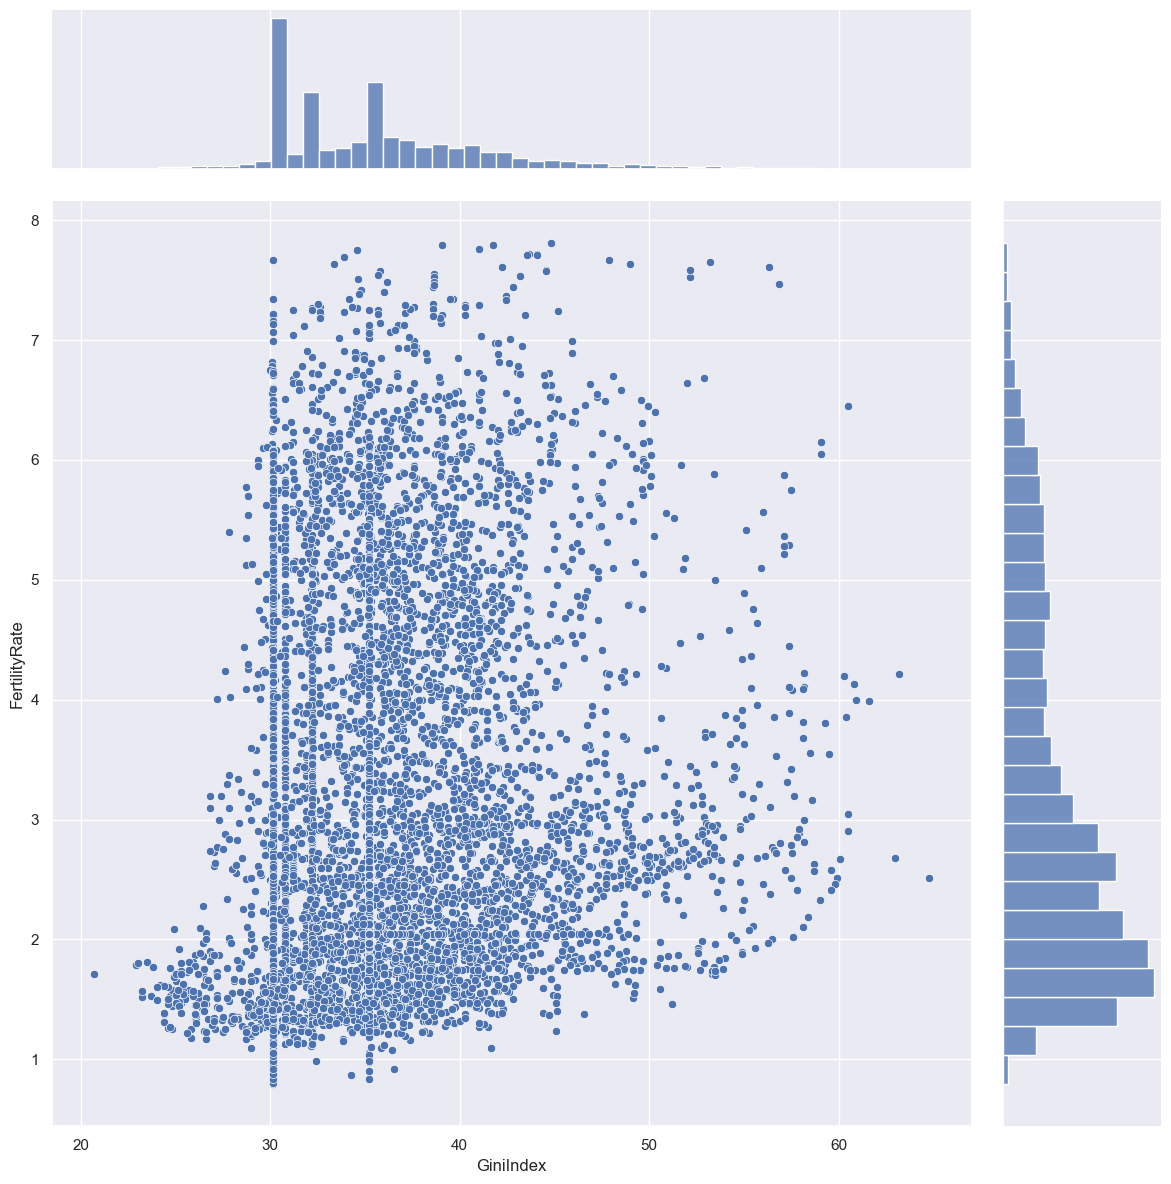

In [538]:
gini_index_df = pd.read_csv('Gini_index.csv', skiprows=4)
sb.jointplot(data = merged_df, x = "GiniIndex", y = "FertilityRate", height = 12)

In [539]:
merged_df.FertilityRate.corr(merged_df.GiniIndex)

0.14226557940502188

In [540]:
# Create a Linear Regression object
linreg3 = LinearRegression()

In [541]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split
# Extract Response and Predictors
y = pd.DataFrame(merged_df['FertilityRate'])
X = pd.DataFrame(merged_df['GiniIndex'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5743, 1) (5743, 1)
Test Set  : (1436, 1) (1436, 1)


In [542]:
linreg3.fit(X_train, y_train)

LinearRegression()

In [543]:
print('Intercept \t: b = ', linreg3.intercept_)
print('Coefficients \t: a = ', linreg3.coef_)

Intercept 	: b =  [1.87357691]
Coefficients 	: a =  [[0.03557817]]


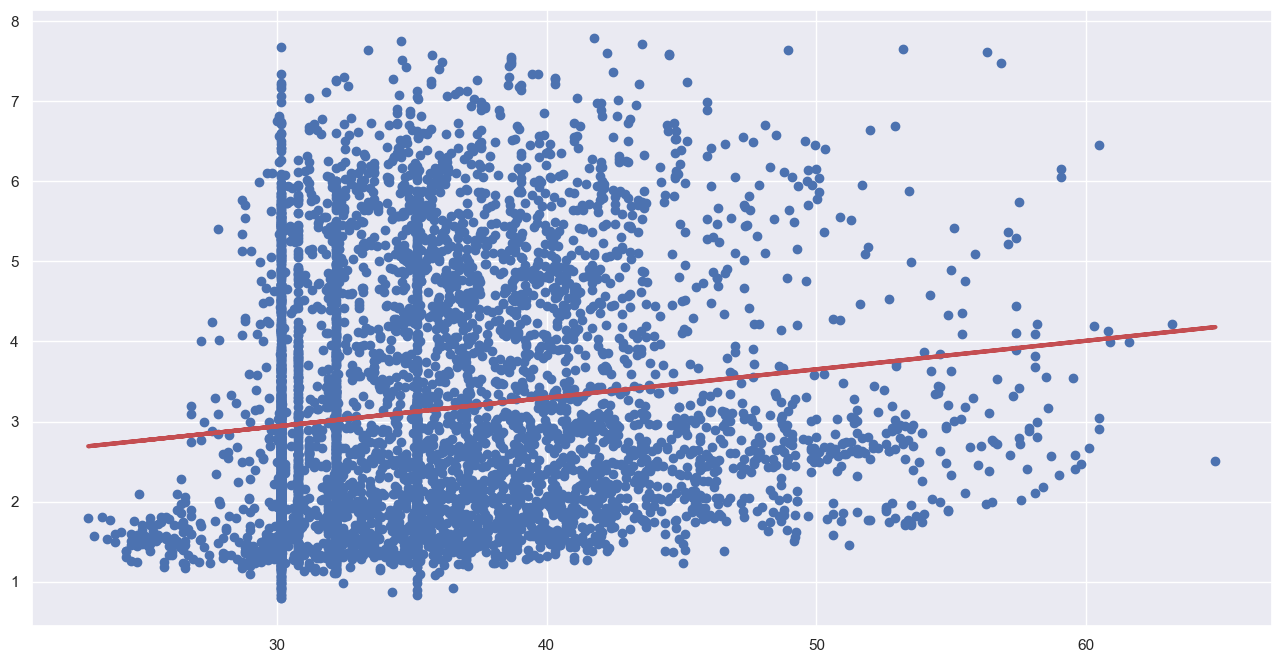

In [544]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg3.intercept_ + linreg3.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [545]:
print("Explained Variance (R^2) \t:", linreg3.score(X_train, y_train))

Explained Variance (R^2) 	: 0.019834707014331543


In [546]:
# Predict the response on the train set
y_train_pred = linreg3.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 2.321714230074567


In [547]:
# Predict FertilityRate values corresponding to GiniIndex
y_test_pred = linreg3.predict(X_test)

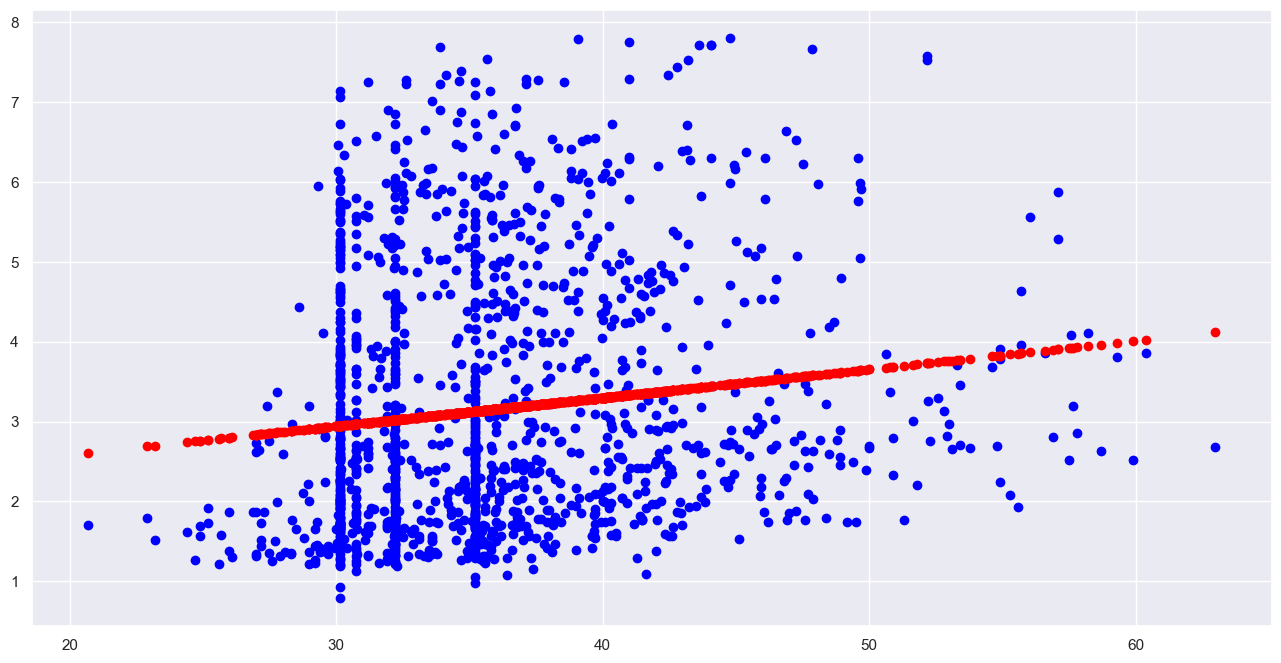

In [548]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [549]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 2.5799148545373756


## Predicting fertility rate using female percentage

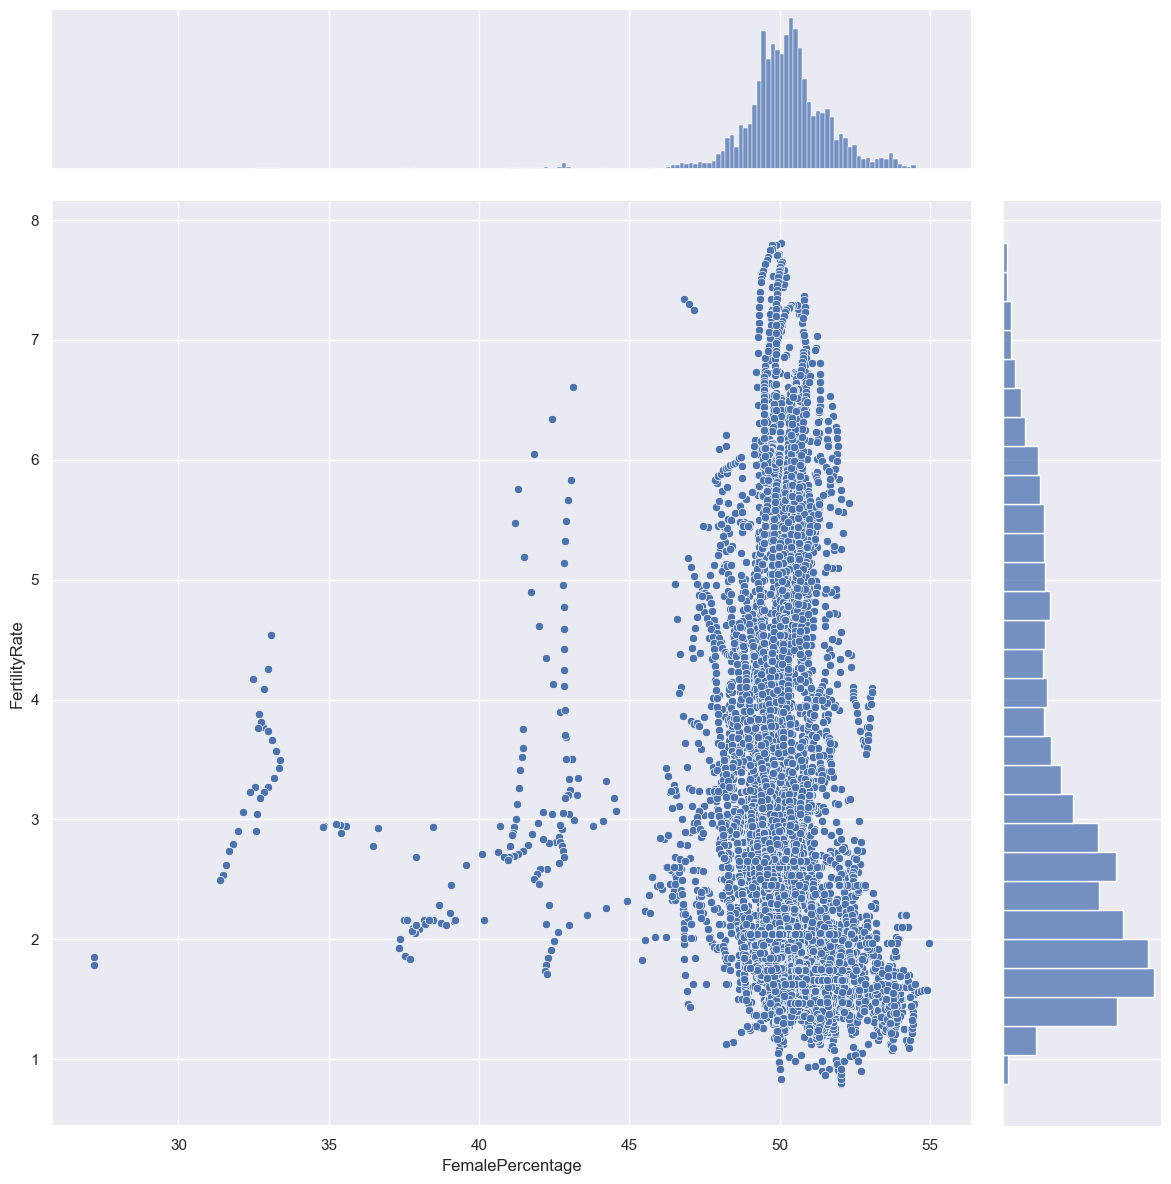

In [550]:
female_percentage_df = pd.read_csv('female percentage of total population.csv', skiprows=4)
sb.jointplot(data = merged_df, x = "FemalePercentage", y = "FertilityRate", height = 12)

In [551]:
merged_df.FertilityRate.corr(merged_df.FemalePercentage)

-0.1501703812480302

In [552]:
# Create a Linear Regression object
linreg4 = LinearRegression()

In [553]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(merged_df['FertilityRate'])
X = pd.DataFrame(merged_df['FemalePercentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5743, 1) (5743, 1)
Test Set  : (1436, 1) (1436, 1)


In [554]:
linreg4.fit(X_train, y_train)

LinearRegression()

In [555]:
print('Intercept \t: b = ', linreg4.intercept_)
print('Coefficients \t: a = ', linreg4.coef_)

Intercept 	: b =  [8.28298758]
Coefficients 	: a =  [[-0.10244618]]


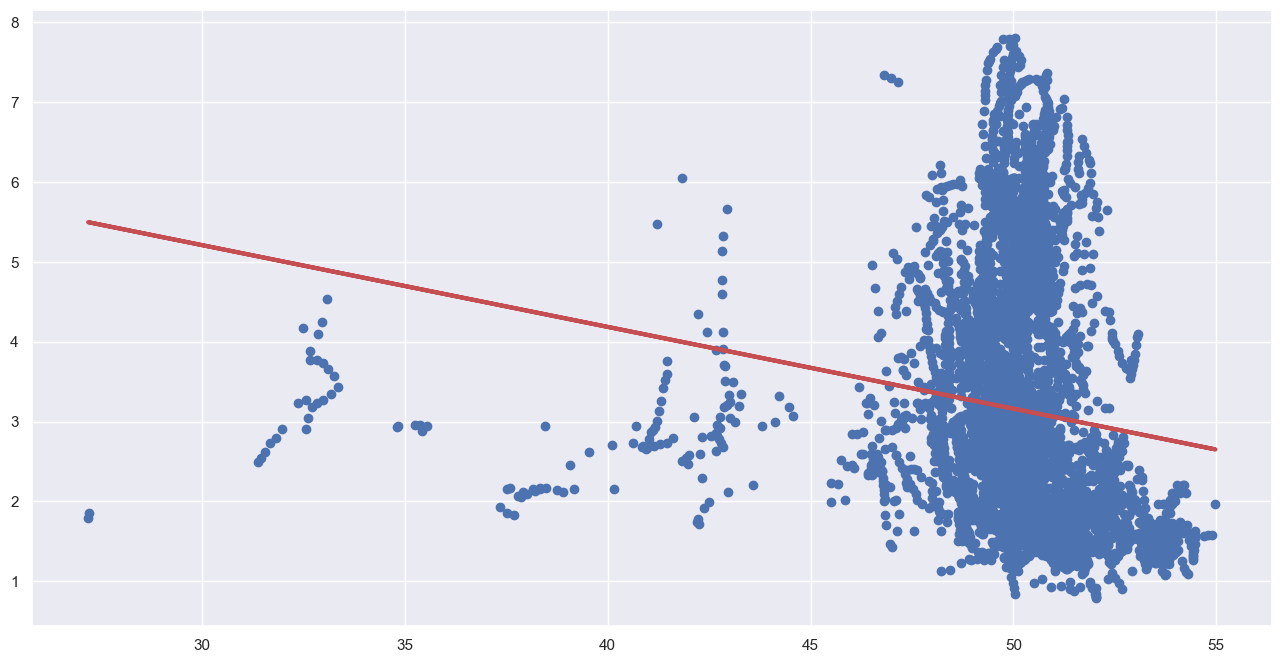

In [556]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg4.intercept_ + linreg4.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [557]:
print("Explained Variance (R^2) \t:", linreg4.score(X_train, y_train))

Explained Variance (R^2) 	: 0.021028967599453496


In [558]:
# Predict the response on the train set
y_train_pred = linreg4.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 2.3427122488830054


In [559]:
# Predict FertilityRate values corresponding to FemalePercentage of total population
y_test_pred = linreg4.predict(X_test)

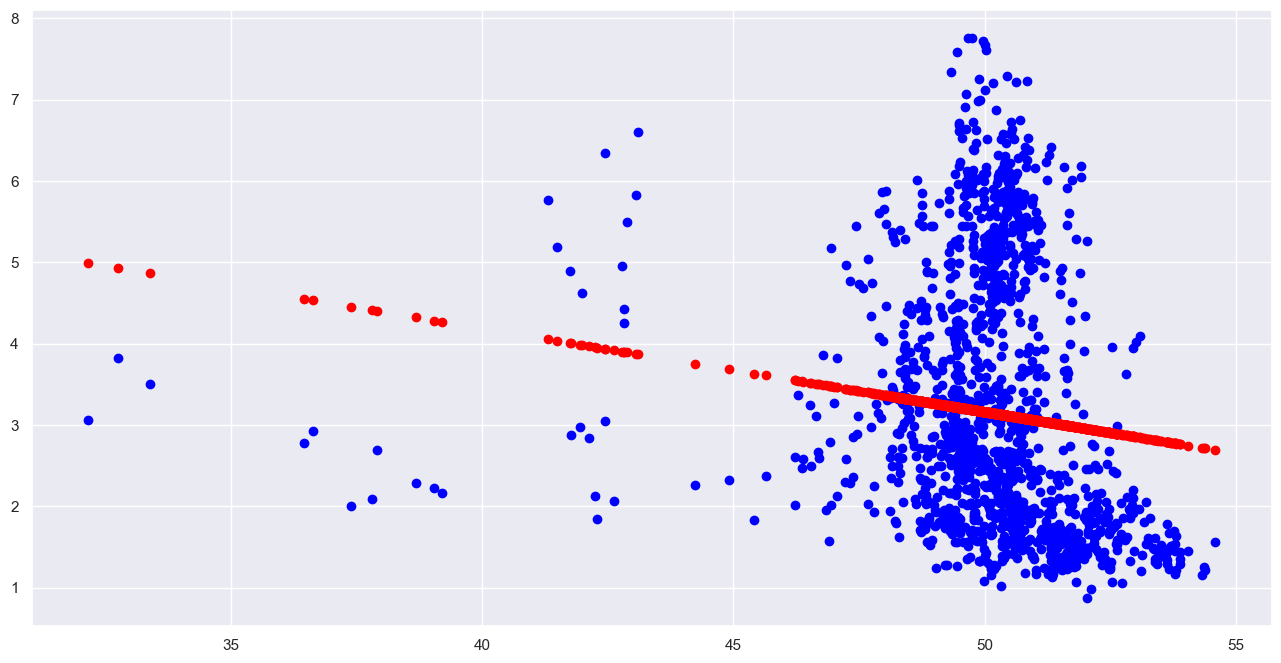

In [560]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [561]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 2.468094047288629


## Predicting fertility rate using literacy rate

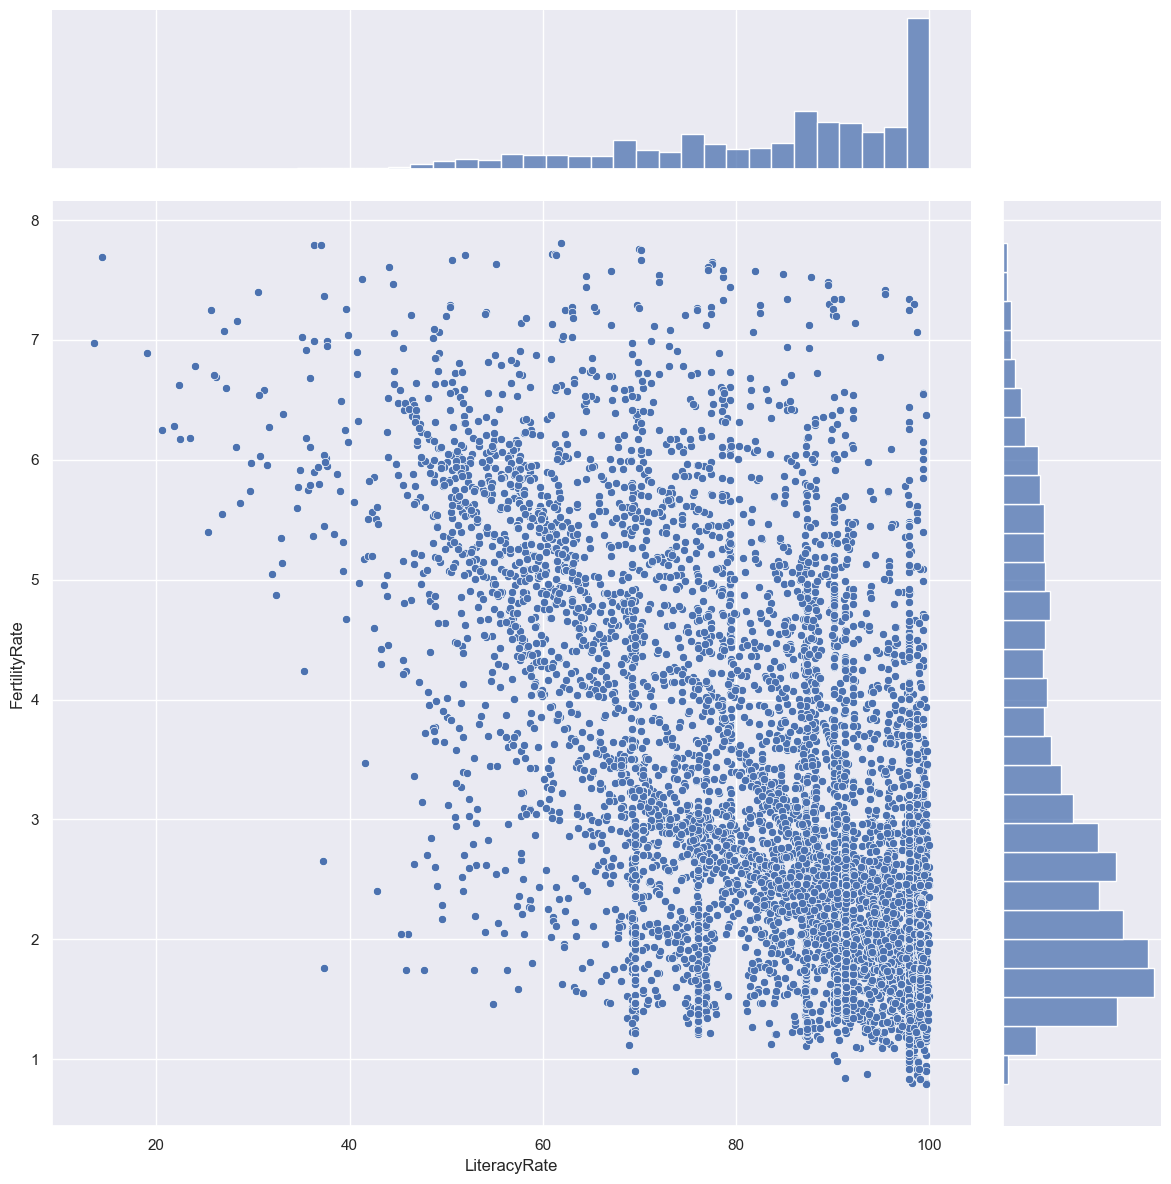

In [562]:
literacy_rate_df = pd.read_csv('Literacy_rate.csv', skiprows=4)
sb.jointplot(data = merged_df, x = "LiteracyRate", y = "FertilityRate", height = 12)

In [563]:
merged_df.FertilityRate.corr(merged_df.LiteracyRate)

-0.6020888583546294

In [564]:
# Create a Linear Regression object
linreg5 = LinearRegression()

In [565]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(merged_df['FertilityRate'])
X = pd.DataFrame(merged_df['LiteracyRate'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5743, 1) (5743, 1)
Test Set  : (1436, 1) (1436, 1)


In [566]:
linreg5.fit(X_train, y_train)

LinearRegression()

In [567]:
print('Intercept \t: b = ', linreg5.intercept_)
print('Coefficients \t: a = ', linreg5.coef_)

Intercept 	: b =  [8.24807308]
Coefficients 	: a =  [[-0.06124459]]


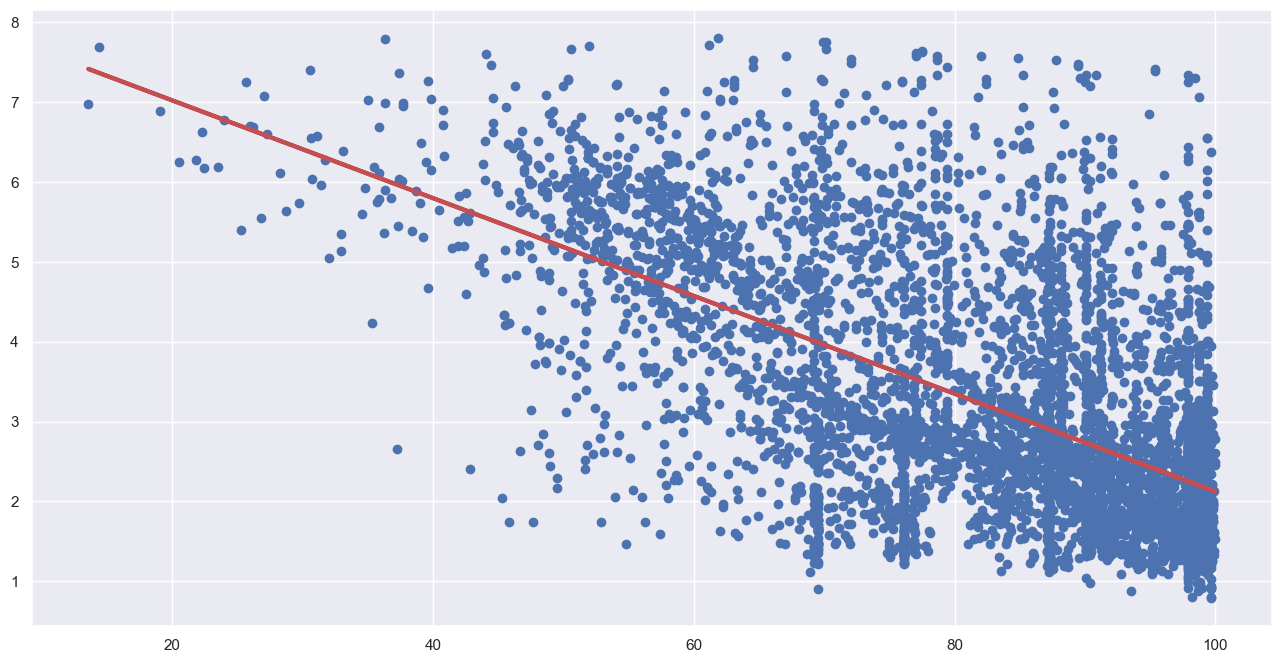

In [568]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg5.intercept_ + linreg5.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [569]:
print("Explained Variance (R^2) \t:", linreg5.score(X_train, y_train))

Explained Variance (R^2) 	: 0.36104933839283115


In [570]:
# Predict the response on the train set
y_train_pred = linreg5.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 1.5648553961424938


In [571]:
# Predict FertilityRate values corresponding to LiteracyRate
y_test_pred = linreg5.predict(X_test)

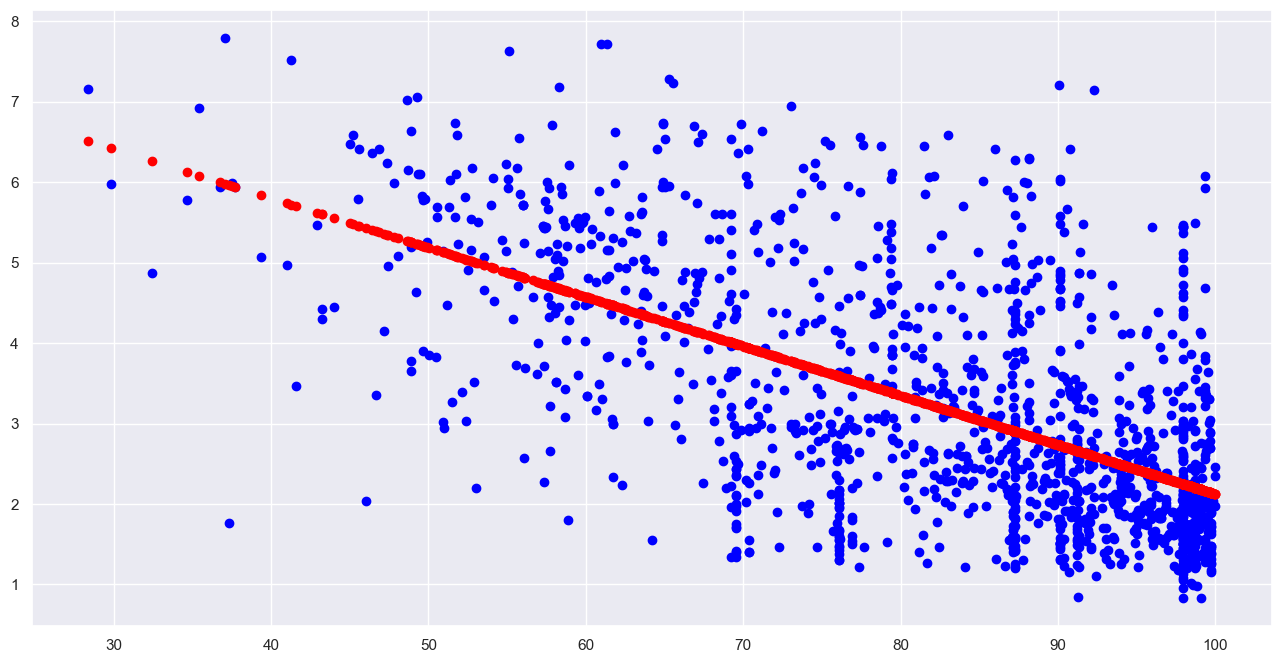

In [572]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [573]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 1.460616651140402


## Predicting fertility rate using multi-variate

In [655]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [656]:
# Extract Response and Predictors
predictors = ["CapitalGDP", "PovertyRate", "LiteracyRate", "FemalePercentage", "GiniIndex", "UnemploymentRate"]

In [657]:
y = pd.DataFrame(merged_df["FertilityRate"])
X = pd.DataFrame(merged_df[predictors])

In [658]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [659]:
# Linear Regression using Train Data
linregMulti = LinearRegression()         # create the linear regression object
linregMulti.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [660]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linregMulti.intercept_)
print('Coefficients of Regression \t: a = ', linregMulti.coef_)
print()

Intercept of Regression 	: b =  [9.34181481]
Coefficients of Regression 	: a =  [[-1.31779296e-05  2.64637518e-02 -4.38421204e-02 -5.38542581e-02
  -1.25928989e-03 -1.24581137e-02]]



In [661]:
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linregMulti.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

         Predictors  Coefficients
0        CapitalGDP     -0.000013
1       PovertyRate      0.026464
2      LiteracyRate     -0.043842
3  FemalePercentage     -0.053854
4         GiniIndex     -0.001259
5  UnemploymentRate     -0.012458



In [662]:
# Predict Response corresponding to Predictors
y_train_pred = linregMulti.predict(X_train)
y_test_pred = linregMulti.predict(X_test)

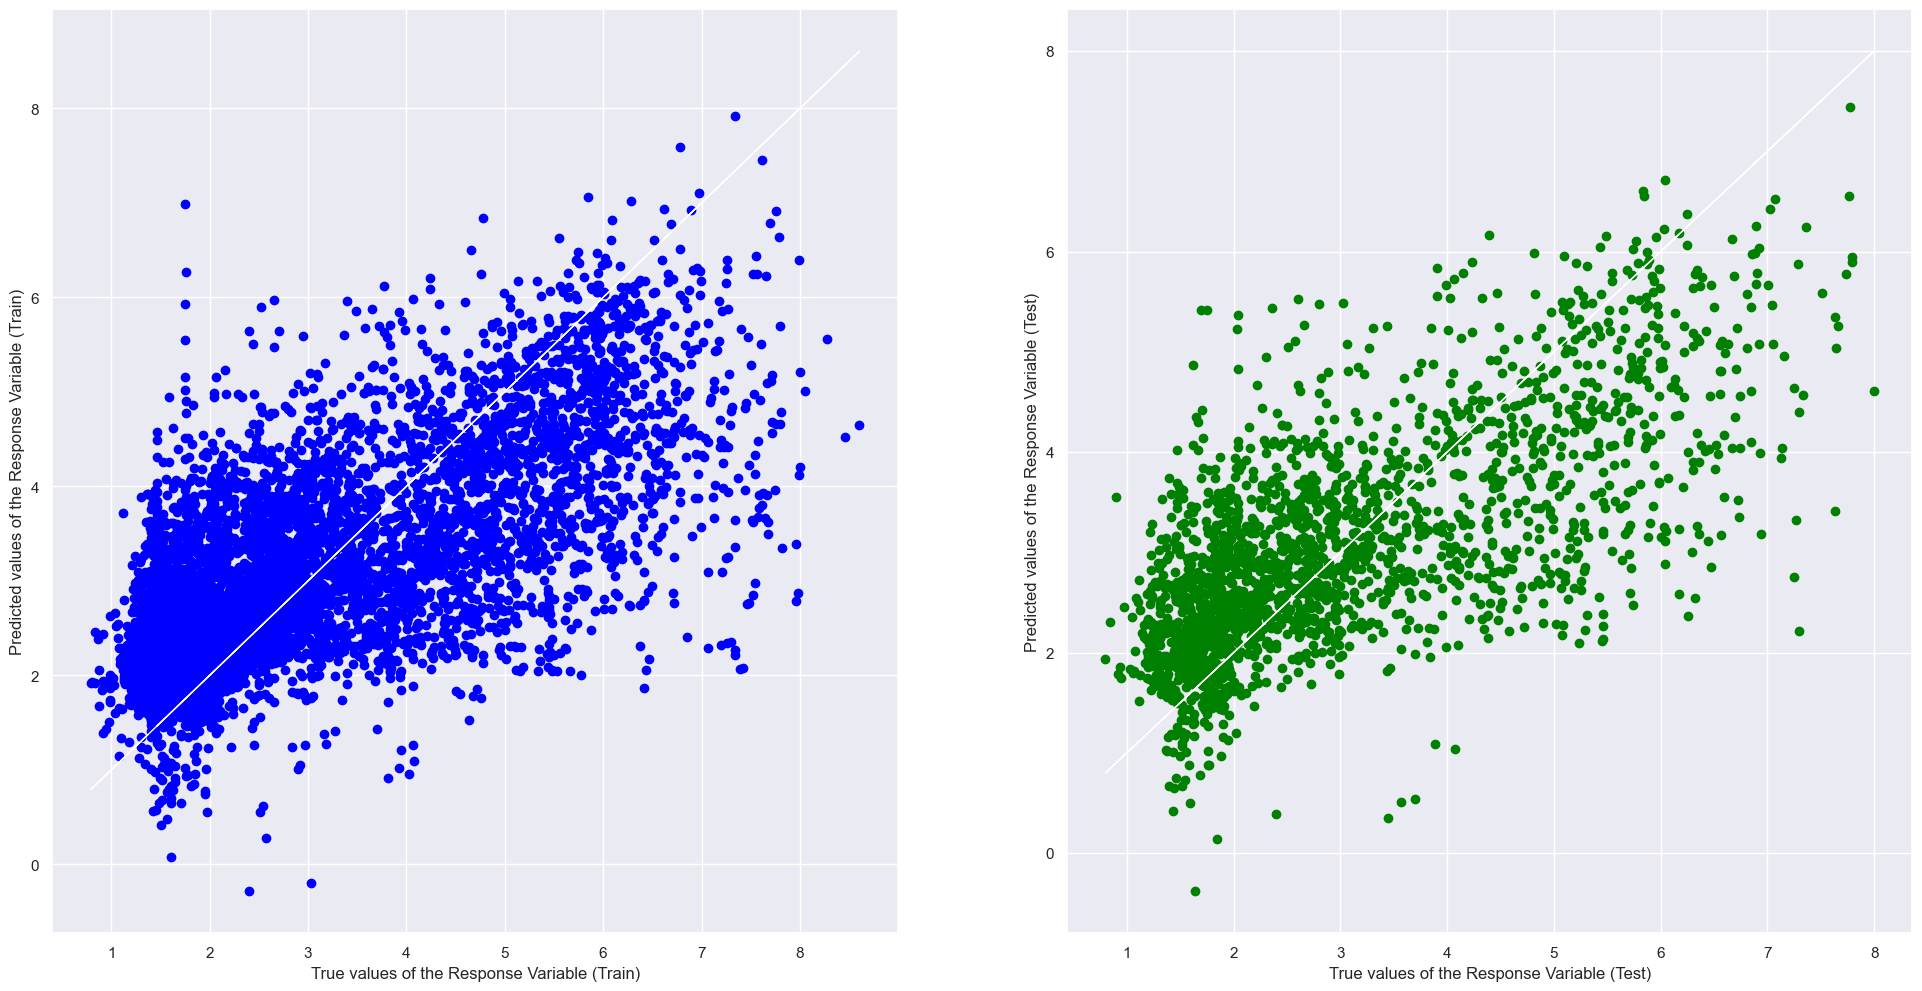

In [663]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [664]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linregMulti.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47113274455981624
Mean Squared Error (MSE) 	: 1.376423938460147



In [665]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linregMulti.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.48375506791788125
Mean Squared Error (MSE) 	: 1.258343668576167



# Machine learning - Multi-Layer Perceptron

## First trial on MLP model

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split into input features (X) and target (y)
X = merged_df.drop(columns=['Country Name', 'Year', 'FertilityRate'])
y = merged_df['FertilityRate']

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a DataLoader for the dataset
class FertilityDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = FertilityDataset(X_train, y_train)
test_dataset = FertilityDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 3. Define the MLP architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X.shape[1]
hidden_size1 = 16
hidden_size2 = 16
output_size = 1

model = MLP(input_size, hidden_size1, hidden_size2, output_size)

# 4. Train the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from sklearn.metrics import r2_score

num_epochs = 100
train_losses = []
test_losses = []
r2_scores = []

for epoch in range(num_epochs):
    # Train the model
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Evaluate the model
    model.eval()
    test_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            y_pred.extend(outputs.view(-1).tolist())
            y_true.extend(targets.view(-1).tolist())
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        r2_scores.append(r2_score(y_true, y_pred))

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, R2 Score: {r2_scores[-1]:.4f}')

# 5. Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss}')

Epoch 1/100, Train Loss: 5.1176, Test Loss: 1.3716, R2 Score: 0.4367
Epoch 2/100, Train Loss: 1.2862, Test Loss: 1.2330, R2 Score: 0.4936
Epoch 3/100, Train Loss: 1.1913, Test Loss: 1.1905, R2 Score: 0.5110
Epoch 4/100, Train Loss: 1.1597, Test Loss: 1.1617, R2 Score: 0.5228
Epoch 5/100, Train Loss: 1.1313, Test Loss: 1.1491, R2 Score: 0.5280
Epoch 6/100, Train Loss: 1.1153, Test Loss: 1.1287, R2 Score: 0.5364
Epoch 7/100, Train Loss: 1.0996, Test Loss: 1.1327, R2 Score: 0.5347
Epoch 8/100, Train Loss: 1.0943, Test Loss: 1.1105, R2 Score: 0.5438
Epoch 9/100, Train Loss: 1.0867, Test Loss: 1.1122, R2 Score: 0.5431
Epoch 10/100, Train Loss: 1.0726, Test Loss: 1.1249, R2 Score: 0.5379
Epoch 11/100, Train Loss: 1.0638, Test Loss: 1.0885, R2 Score: 0.5527
Epoch 12/100, Train Loss: 1.0567, Test Loss: 1.0771, R2 Score: 0.5574
Epoch 13/100, Train Loss: 1.0464, Test Loss: 1.0876, R2 Score: 0.5531
Epoch 14/100, Train Loss: 1.0407, Test Loss: 1.0645, R2 Score: 0.5626
Epoch 15/100, Train Loss: 1.0

## Result visualization of the first MLP model trial

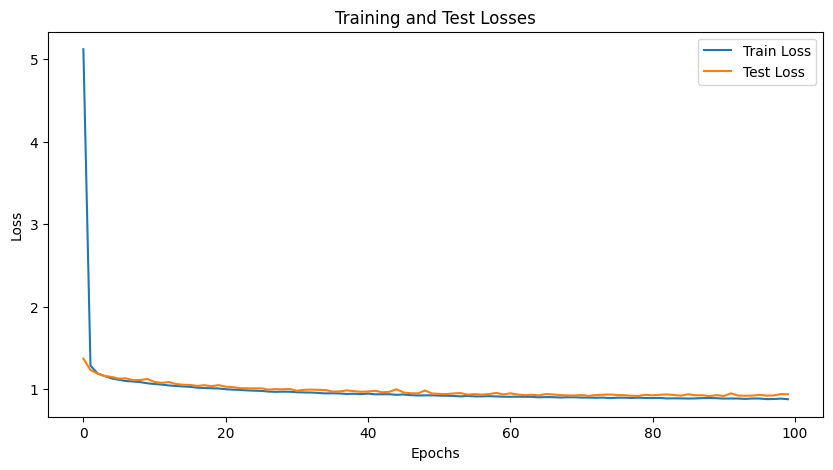

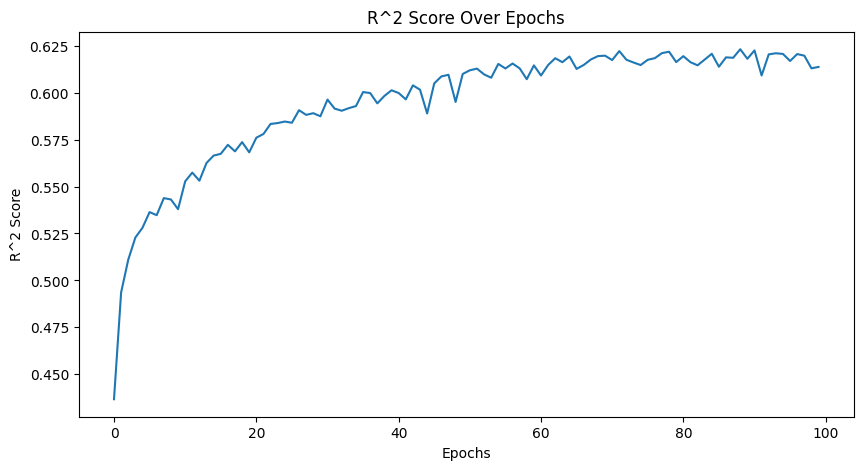

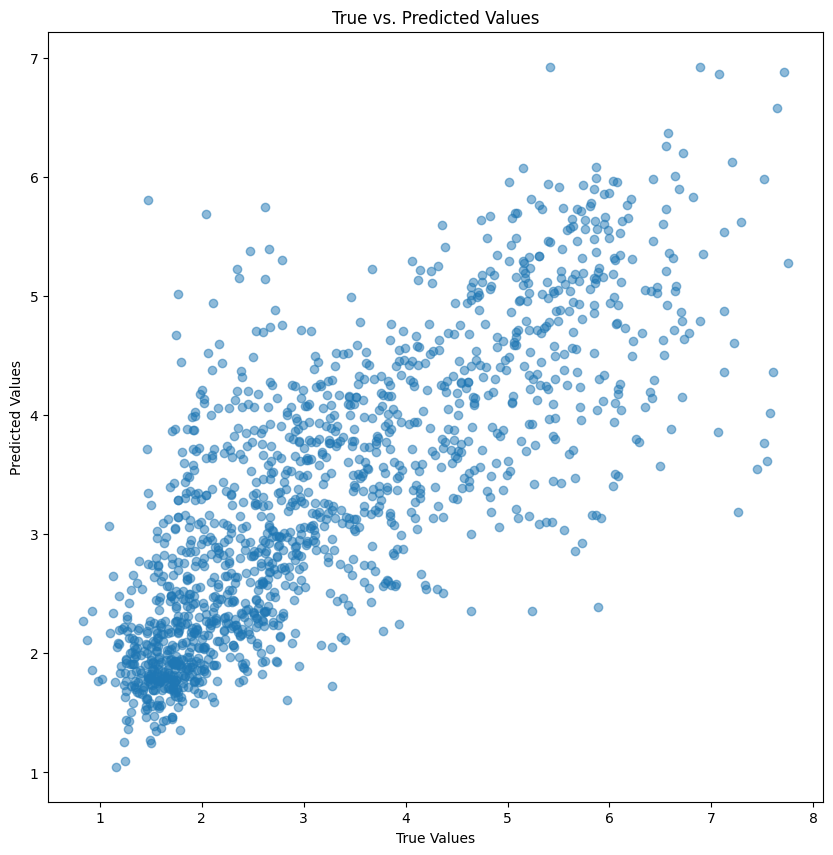

In [17]:
import matplotlib.pyplot as plt

# Plot training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()

# Plot R^2 score
plt.figure(figsize=(10, 5))
plt.plot(r2_scores)
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Over Epochs')
plt.show()

# Calculate the final predictions and true values
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        y_pred.extend(outputs.view(-1).tolist())
        y_true.extend(targets.view(-1).tolist())

# Scatter plot comparing the true and predicted values
plt.figure(figsize=(10, 10))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Find the best hyperparameters

In [577]:
from sklearn.base import BaseEstimator, RegressorMixin

class SklearnMLP(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, num_epochs=100, batch_size=32, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
        self.model = MLP(input_size, hidden_size1, hidden_size2, output_size)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        
    def fit(self, X, y):
        dataset = FertilityDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        for epoch in range(self.num_epochs):
            self.model.train()
            for inputs, targets in data_loader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                loss.backward()
                self.optimizer.step()
                
        return self
    
    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
        return outputs.view(-1).numpy()


In [578]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_size1': [32, 64, 128],
    'hidden_size2': [16, 32, 64],
    'num_epochs': [50, 100, 150],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.01, 0.001, 0.0001],
}

mlp = SklearnMLP(input_size, hidden_size1, hidden_size2, output_size)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best R^2 score: ", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'batch_size': 16, 'hidden_size1': 64, 'hidden_size2': 16, 'learning_rate': 0.001, 'num_epochs': 50}
Best R^2 score:  0.5108035818632688


## Implement MLP model based on the best hyperparameters

In [579]:
# Extract the best hyperparameters
best_params = grid_search.best_params_
best_batch_size = best_params['batch_size']
best_hidden_size1 = best_params['hidden_size1']
best_hidden_size2 = best_params['hidden_size2']
best_learning_rate = best_params['learning_rate']
best_num_epochs = best_params['num_epochs']

# Create the DataLoader with the best batch_size
train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False)

# Create the MLP model with the best hyperparameters
best_model = MLP(input_size, best_hidden_size1, best_hidden_size2, output_size)

# Train the model with the best hyperparameters
criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_learning_rate)

train_losses = []
test_losses = []
r2_scores = []

for epoch in range(best_num_epochs):
    # Train the model
    best_model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = best_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Evaluate the model
    best_model.eval()
    test_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = best_model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            y_pred.extend(outputs.view(-1).tolist())
            y_true.extend(targets.view(-1).tolist())
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        r2_scores.append(r2_score(y_true, y_pred))

    print(f'Epoch {epoch+1}/{best_num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, R2 Score: {r2_scores[-1]:.4f}')


Epoch 1/50, Train Loss: 2.6464, Test Loss: 1.2141, R2 Score: 0.5006
Epoch 2/50, Train Loss: 1.1449, Test Loss: 1.1274, R2 Score: 0.5363
Epoch 3/50, Train Loss: 1.0849, Test Loss: 1.1006, R2 Score: 0.5472
Epoch 4/50, Train Loss: 1.0648, Test Loss: 1.0812, R2 Score: 0.5551
Epoch 5/50, Train Loss: 1.0480, Test Loss: 1.0625, R2 Score: 0.5629
Epoch 6/50, Train Loss: 1.0273, Test Loss: 1.0694, R2 Score: 0.5600
Epoch 7/50, Train Loss: 1.0166, Test Loss: 1.0469, R2 Score: 0.5693
Epoch 8/50, Train Loss: 0.9973, Test Loss: 1.0386, R2 Score: 0.5727
Epoch 9/50, Train Loss: 0.9890, Test Loss: 1.0299, R2 Score: 0.5763
Epoch 10/50, Train Loss: 0.9752, Test Loss: 1.0009, R2 Score: 0.5882
Epoch 11/50, Train Loss: 0.9586, Test Loss: 1.0388, R2 Score: 0.5727
Epoch 12/50, Train Loss: 0.9527, Test Loss: 0.9947, R2 Score: 0.5908
Epoch 13/50, Train Loss: 0.9455, Test Loss: 0.9780, R2 Score: 0.5976
Epoch 14/50, Train Loss: 0.9388, Test Loss: 0.9818, R2 Score: 0.5961
Epoch 15/50, Train Loss: 0.9254, Test Loss:

## Result visualization of the best MLP model trial

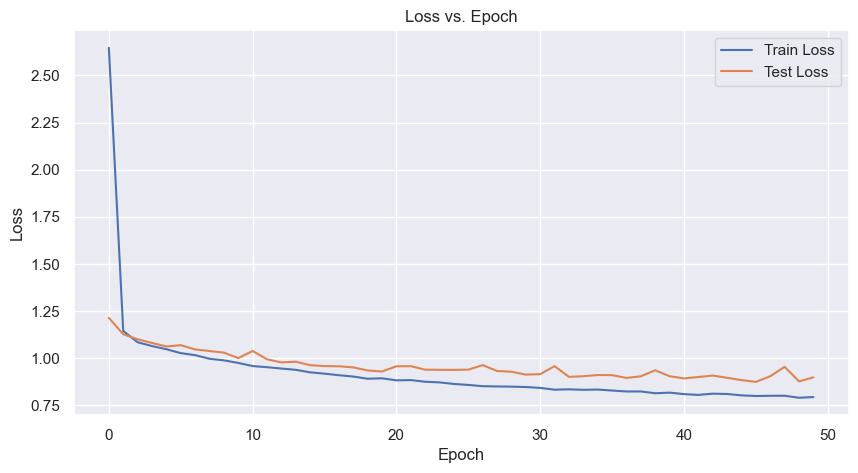

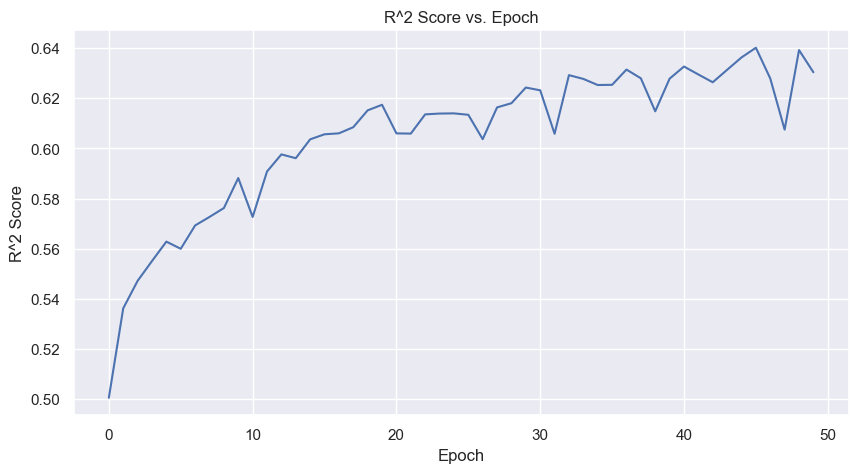

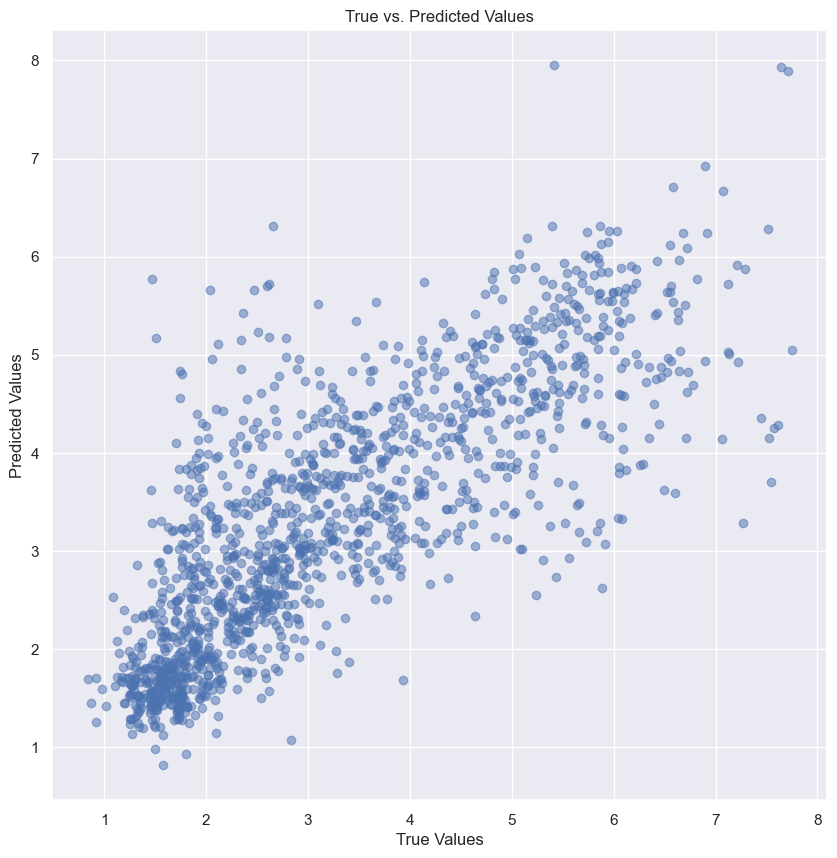

In [580]:
# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

# Plot the R^2 score
plt.figure(figsize=(10, 5))
plt.plot(r2_scores)
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Epoch')
plt.show()

# Calculate the final predictions and true values
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = best_model(inputs)
        y_pred.extend(outputs.view(-1).tolist())
        y_true.extend(targets.view(-1).tolist())

# Scatter plot comparing the true and predicted values
plt.figure(figsize=(10, 10))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()